# Who wants a glass of wine?

## 1. Import libraries

In [323]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

ImportError: cannot import name '_astype_copy_false' from 'sklearn.utils.fixes' (/Users/macbook/opt/anaconda3/envs/IOD/lib/python3.9/site-packages/sklearn/utils/fixes.py)

## 2. Load data

In [176]:
cp = pd.read_csv('marketing_campaign.csv')

In [177]:
cp.head() #succesfully imported data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Exploratory Data Analysis

In [178]:
cp.shape #good sample size

(2240, 29)

In [179]:
cp.index.duplicated() #No duplicate value

array([False, False, False, ..., False, False, False])

In [180]:
cp.columns #To convert column names to lower case for easier use

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [181]:
cp.columns = cp.columns.str.lower()
cp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [182]:
cp.dtypes #Dt_Customer is currently an Object that should be converted to date format

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [183]:
cp['dt_customer'] = pd.to_datetime(cp['dt_customer'], format=None)

In [184]:
cp['dt_customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

In [185]:
cp.isnull().sum() #To investigate missing values

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [186]:
cp[cp['income'].isnull()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


In [187]:
cp.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [188]:
#Replacing missing income value with quantile value at 50%
cp['income'] = cp['income'].fillna(cp['income'].quantile(q=0.5))

In [189]:
cp['income'].isnull().sum() #Null value resolved

0

In [190]:
cp.income.describe() #Maximum income as unsual amount, could be error/outlier

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [191]:
cp[cp['income']>78522] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,2,0,0,1,0,0,0,3,11,0
40,8601,1980,Graduation,Married,80011.0,0,1,2013-04-29,3,421,...,4,0,0,0,0,0,0,3,11,0
45,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,1,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,2012-11-08,2,650,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-06-11,38,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-05-02,42,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-12-10,42,594,...,2,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-05-04,54,332,...,1,0,0,0,0,0,0,3,11,0


Now it is quite obvious that income value in row 2233 possibly be an outlier, we can drop this row

In [192]:
cp[cp['income']==666666.0] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [193]:
cp = cp.drop(labels=2233, axis=0)

In [194]:
cp['z_costcontact'].value_counts()

3    2239
Name: z_costcontact, dtype: int64

In [195]:
cp['z_revenue'].value_counts()

11    2239
Name: z_revenue, dtype: int64

Column z_costcontact and z_revenue contain meaningless value to this analysis so we'll drop them both too

In [196]:
cp = cp.drop(labels=['z_costcontact', 'z_revenue'], axis=1)

In [197]:
cp.year_birth.describe()

count    2239.000000
mean     1968.802144
std        11.985494
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64

In [198]:
cp[cp['year_birth'] < 1940] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0


year of birth of these 3 customer seemed to be an error, we'll drop them out

In [199]:
cp = cp.drop(labels=192, axis=0)

In [200]:
cp = cp.drop(labels=239, axis=0)

In [201]:
cp = cp.drop(labels=339, axis=0)

In [202]:
cp = cp.drop(labels=['id'], axis=1) #Irrelevant value

In [203]:
cp['dt_customer'].describe().T 

count                    2236
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: dt_customer, dtype: object

In [204]:
cp = cp.drop(labels=['dt_customer'], axis=1) #Irrelevant value

In [206]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
year_birth,2236.0,1968.898032,11.703281,1940.0,1959.0,1970.0,1977.00,1996.0
income,2236.0,51952.614043,21411.466851,1730.0,35502.5,51381.5,68275.75,162397.0
kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0
teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0
recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
mntwines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
mntfruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
mntmeatproducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
mntfishproducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
mntsweetproducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0


We want to convert year of birth feature to age

In [207]:
cp['age'] = 2022 - cp['year_birth']

In [208]:
cp['age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2236, dtype: int64

We'll keep age column and drop year of birth

In [209]:
cp = cp.drop(labels=['year_birth'], axis=1)

Now we want to look at responses of each campaign

In [86]:
cp['acceptedcmp1'].value_counts()

0    2092
1     144
Name: acceptedcmp1, dtype: int64

In [87]:
cp['acceptedcmp2'].value_counts()

0    2206
1      30
Name: acceptedcmp2, dtype: int64

In [88]:
cp['acceptedcmp3'].value_counts()

0    2073
1     163
Name: acceptedcmp3, dtype: int64

In [89]:
cp['acceptedcmp4'].value_counts()

0    2069
1     167
Name: acceptedcmp4, dtype: int64

In [90]:
cp['acceptedcmp5'].value_counts()

0    2074
1     162
Name: acceptedcmp5, dtype: int64

We now want to create a new column to combine campaign acceptance results from all current campaigns

In [210]:
cmps = list(zip(cp.acceptedcmp1, cp.acceptedcmp2, cp.acceptedcmp3, cp.acceptedcmp4, cp.acceptedcmp5))
cmp_list = [np.argmax(x) for x in cmps]
for i in cmps:
    print(i)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 1)
(0, 0, 0, 0, 0)
(0, 0, 0

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 1, 1, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(1, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 1)
(1, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 1, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0

In [211]:
agg_ = [np.sum(i) for i in cmps]
agg_[:5]

[0, 0, 0, 0, 0]

In [212]:

cmpresponse = []

for agg, index in zip(agg_, cmps):
    if agg == 0:
        cmpresponse.append('none')
    elif agg == 1:
        if np.argmax(index) == 0:
            cmpresponse.append('cmp1')
        elif np.argmax(index) == 1:
            cmpresponse.append('cmp2')
        elif np.argmax(index) == 2:
            cmpresponse.append('cmp3')
        elif np.argmax(index) == 3:
            cmpresponse.append('cmp4')
        else:
            cmpresponse.append('cmp5')
        
    elif agg > 1:
        cmpresponse.append('multiple')
    
    
    else:
        print('error !')

In [213]:
cp['cmpresponse'] = pd.DataFrame (cmpresponse, columns = ['cmpresponse'])

In [214]:
cp['cmpresponse'].value_counts()

none        1772
multiple     137
cmp3         129
cmp4          83
cmp5          58
cmp1          52
cmp2           1
Name: cmpresponse, dtype: int64

In [215]:
cp['mntwines'].describe()

count    2236.00000
mean      304.12746
std       336.59181
min         0.00000
25%        24.00000
50%       174.00000
75%       504.25000
max      1493.00000
Name: mntwines, dtype: float64

In [216]:
mntwinespend_list = cp.mntwines

In [217]:
mntwinespend = []

for v in mntwinespend_list:
    if v <= 0:
        mntwinespend.append('0')
    elif v <= 50:
        mntwinespend.append('1')    
    elif v <= 100:
        mntwinespend.append('2')
    elif v <= 500:
        mntwinespend.append('3')
    elif v <= 1000:
        mntwinespend.append('4')
    elif v > 1000:
        mntwinespend.append('5')
    else:
        print('error')

In [218]:
cp['mntwinespend'] = pd.DataFrame (mntwinespend, columns = ['mntwinespend'])

In [219]:
cp.mntwines.describe()

count    2236.00000
mean      304.12746
std       336.59181
min         0.00000
25%        24.00000
50%       174.00000
75%       504.25000
max      1493.00000
Name: mntwines, dtype: float64

In [220]:
cp.mntwinespend.value_counts()

1    756
3    722
4    452
2    179
5    110
0     13
Name: mntwinespend, dtype: int64

In [221]:
cp.mntwinespend.unique()

array(['4', '1', '3', '2', '5', '0', nan], dtype=object)

In [222]:
cp.cmpresponse.unique()

array(['none', 'cmp3', 'multiple', 'cmp1', 'cmp4', 'cmp5', 'cmp2', nan],
      dtype=object)

In [223]:
cp[cp['cmpresponse'].isnull()]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,76,NaN,NaN
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,41,NaN,NaN
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,66,NaN,NaN
2239,PhD,Married,52869.0,1,1,40,84,3,61,2,...,0,0,0,0,0,0,1,68,NaN,NaN


In [224]:
cp[cp['mntwinespend'].isnull()]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,76,NaN,NaN
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,41,NaN,NaN
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,66,NaN,NaN
2239,PhD,Married,52869.0,1,1,40,84,3,61,2,...,0,0,0,0,0,0,1,68,NaN,NaN


In [225]:
cp = cp.drop(labels=2236, axis=0)

In [226]:
cp = cp.drop(labels=2237, axis=0)

In [227]:
cp = cp.drop(labels=2238, axis=0)

In [228]:
cp = cp.drop(labels=2239, axis=0)

In [229]:
cp.head()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,65,none,4
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,68,none,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,57,none,3
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,38,none,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,41,none,3


In [230]:
cp.cmpresponse.unique()

array(['none', 'cmp3', 'multiple', 'cmp1', 'cmp4', 'cmp5', 'cmp2'],
      dtype=object)

In [234]:
cp.mntwinespend.unique()

array(['4', '1', '3', '2', '5', '0'], dtype=object)

In [235]:
cp.mntwinespend = cp.mntwinespend.astype(int)

In [236]:
cp.dtypes

education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
response                 int64
age                      int64
cmpresponse             object
mntwinespend             int64
dtype: object

# Visualisation of data

Now we want to look at personality of customers who accepted current campaigns

<Figure size 720x576 with 0 Axes>

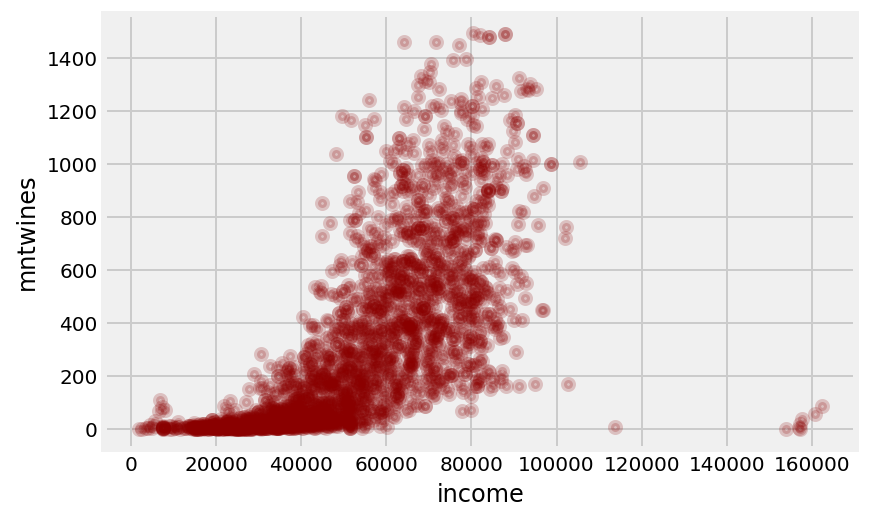

In [93]:
plt.figure(figsize=(10,8))
cp.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('income&wine2.png')
plt.show()

<Figure size 720x576 with 0 Axes>

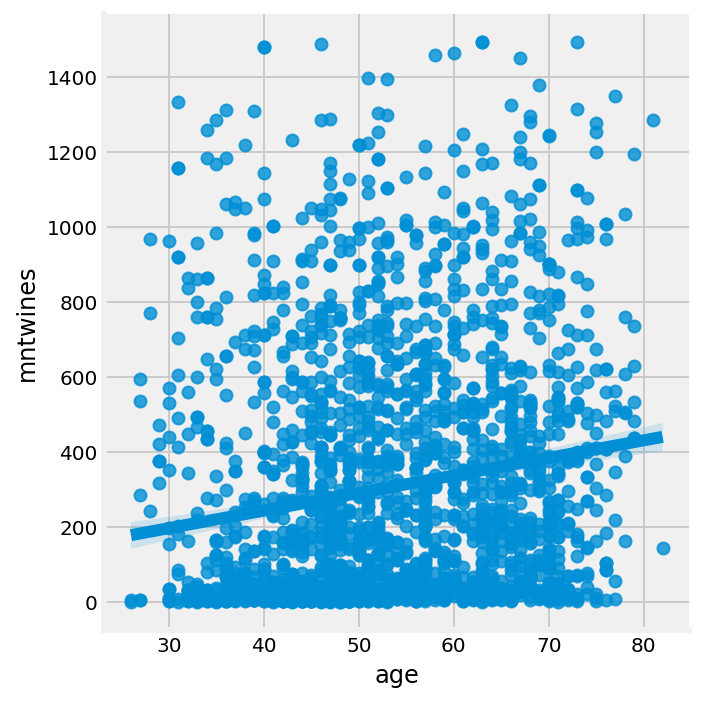

In [94]:
plt.figure(figsize=(10,8))
sns.lmplot(x='ag', y='mntwines', data=cp);
plt.savefig('age&wine.png')
plt.show()

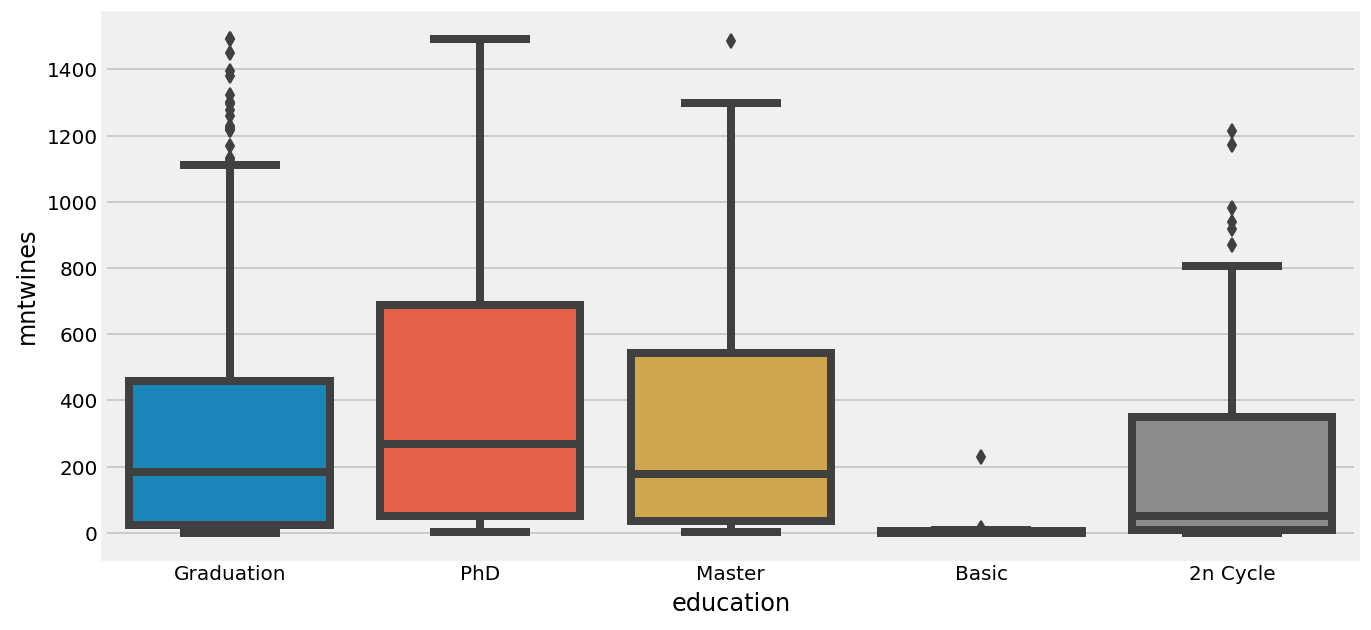

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='education', data=cp)

plt.savefig('education&wine.png')
plt.show()

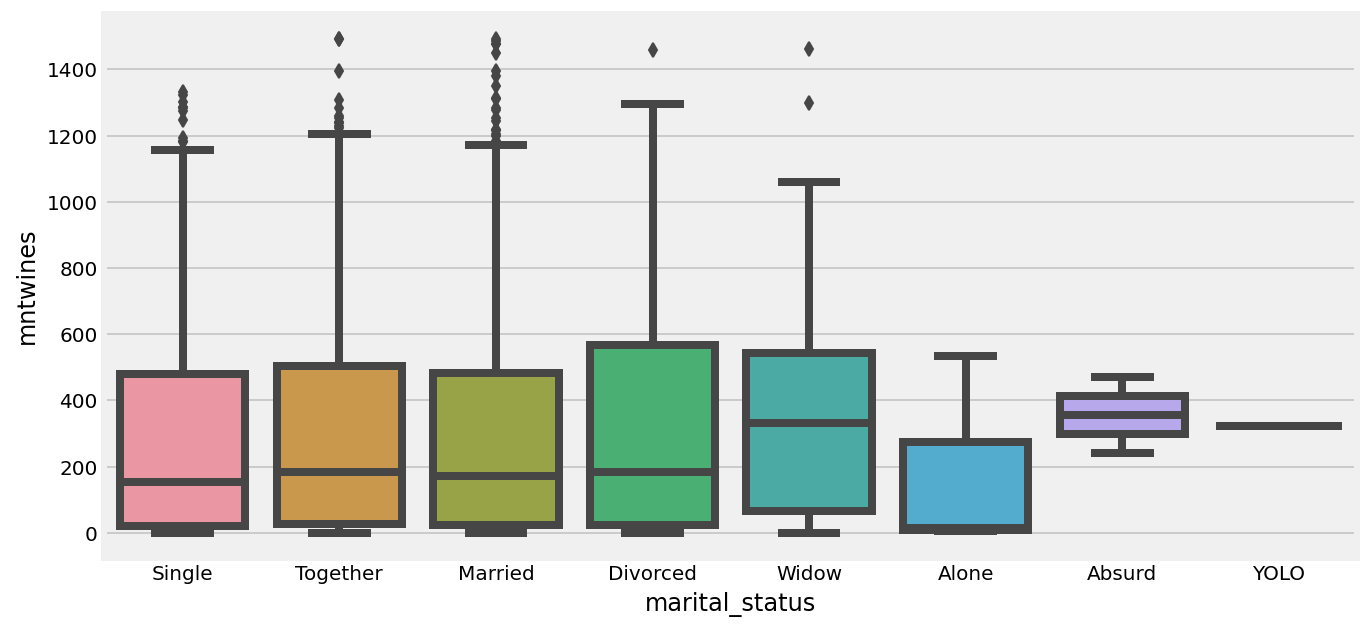

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='marital_status', data=cp)
plt.savefig('wine&maritalstatus.png')
plt.show()

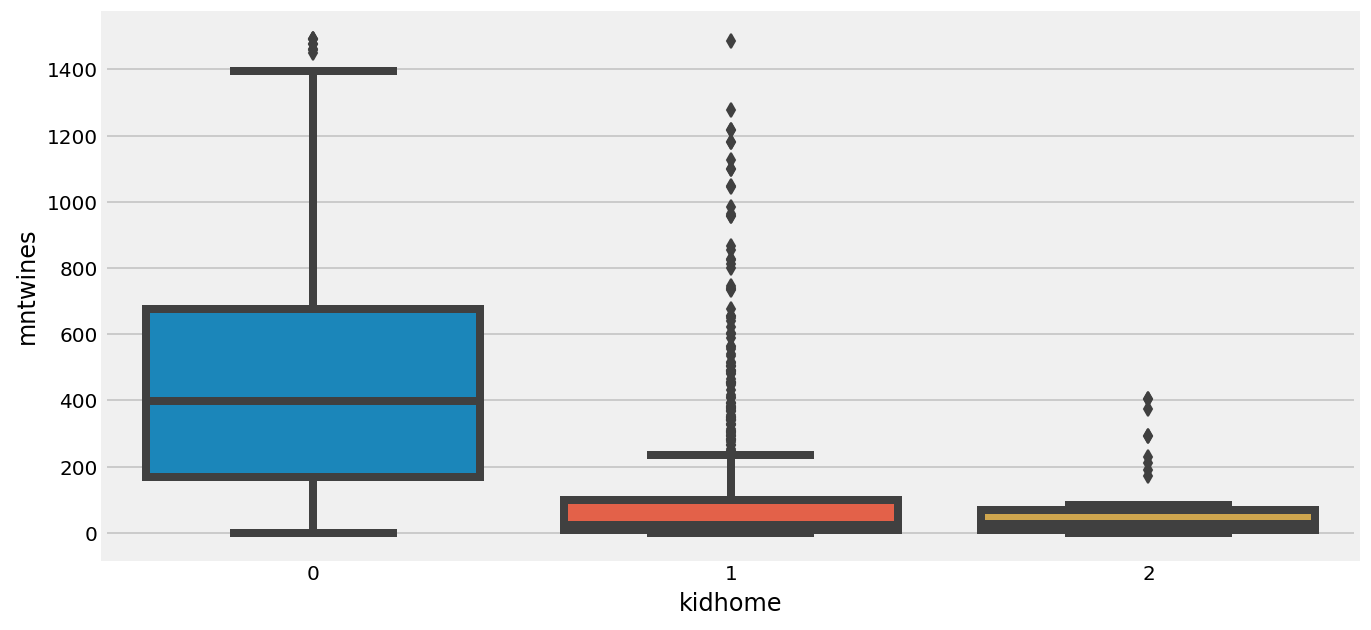

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='kidhome', data=cp)

plt.savefig('wine&kidhome.png')
plt.show()

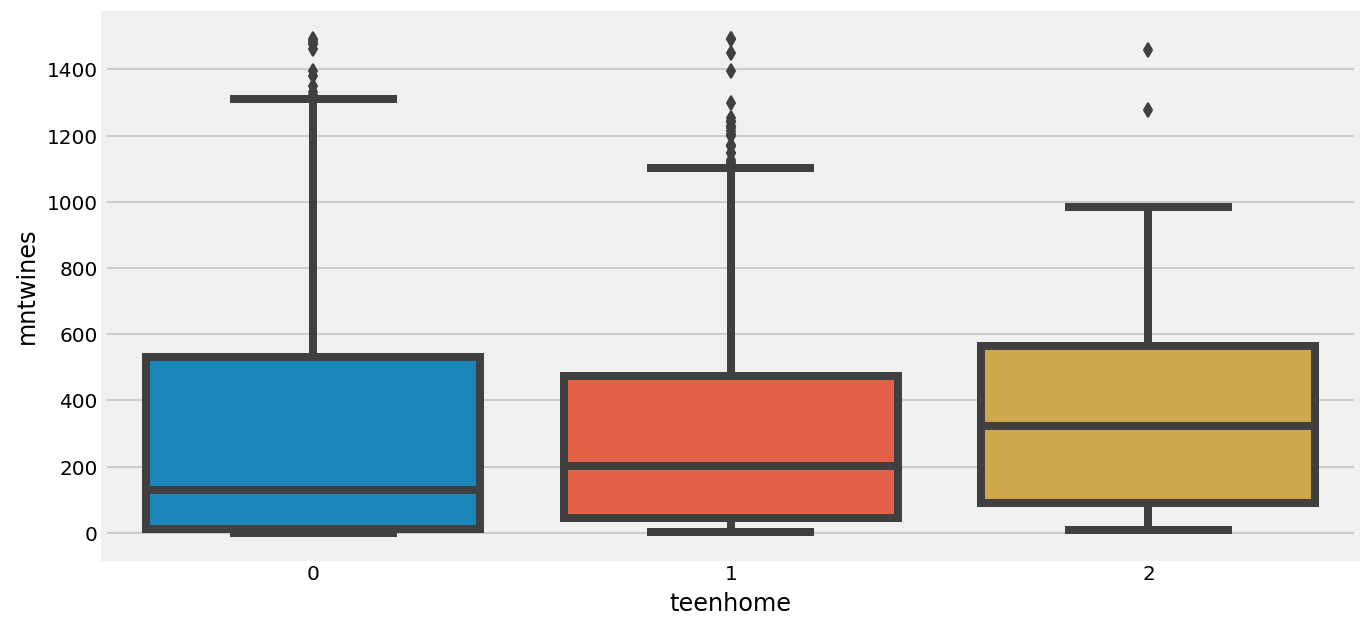

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='teenhome', data=cp)

plt.savefig('wine&teenhome.png')
plt.show()

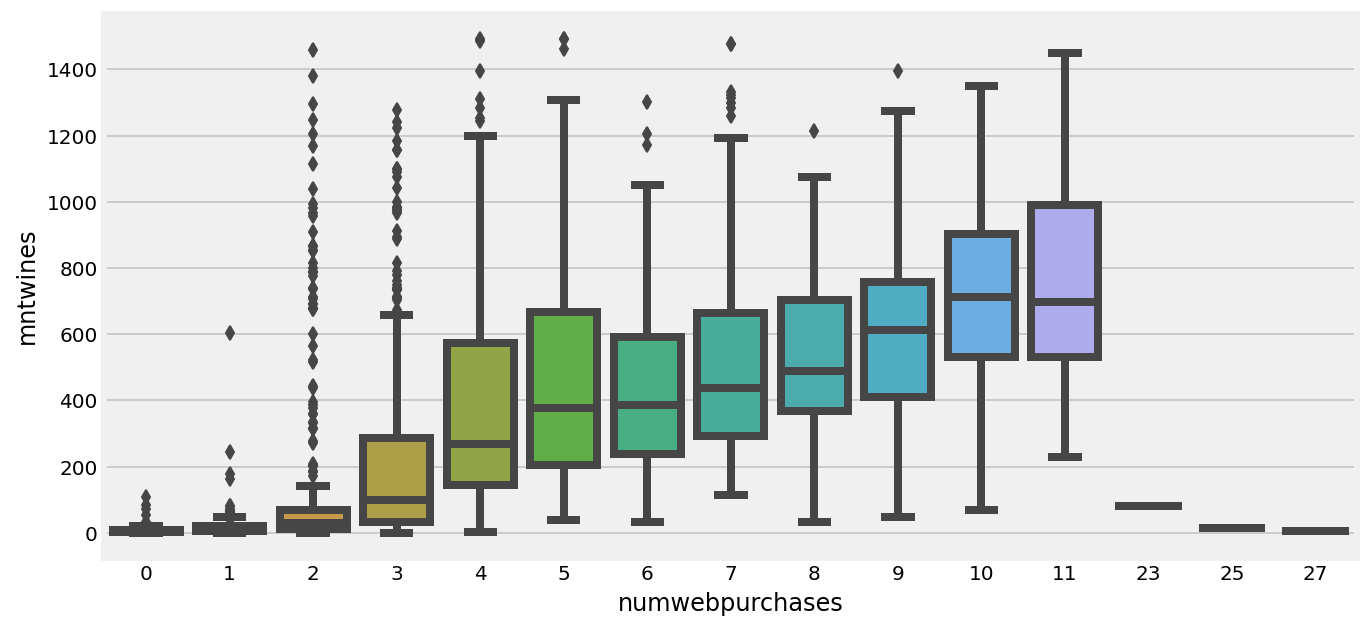

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='numwebpurchases', data=cp)

plt.savefig('wine&webpurs.png')
plt.show()

In [100]:
#mntwines vs Product paring
cp_pp = cp.drop(labels=['education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'recency','numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'age',
       'complain', 'response', 'mntgoldprods', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'], axis=1)
cp_pp.head()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,cmpresponse,mntwinespend
0,635,88,546,172,88,none,3
1,11,1,6,2,1,none,1
2,426,49,127,111,21,none,2
3,11,4,20,10,3,none,1
4,173,43,118,46,27,none,2


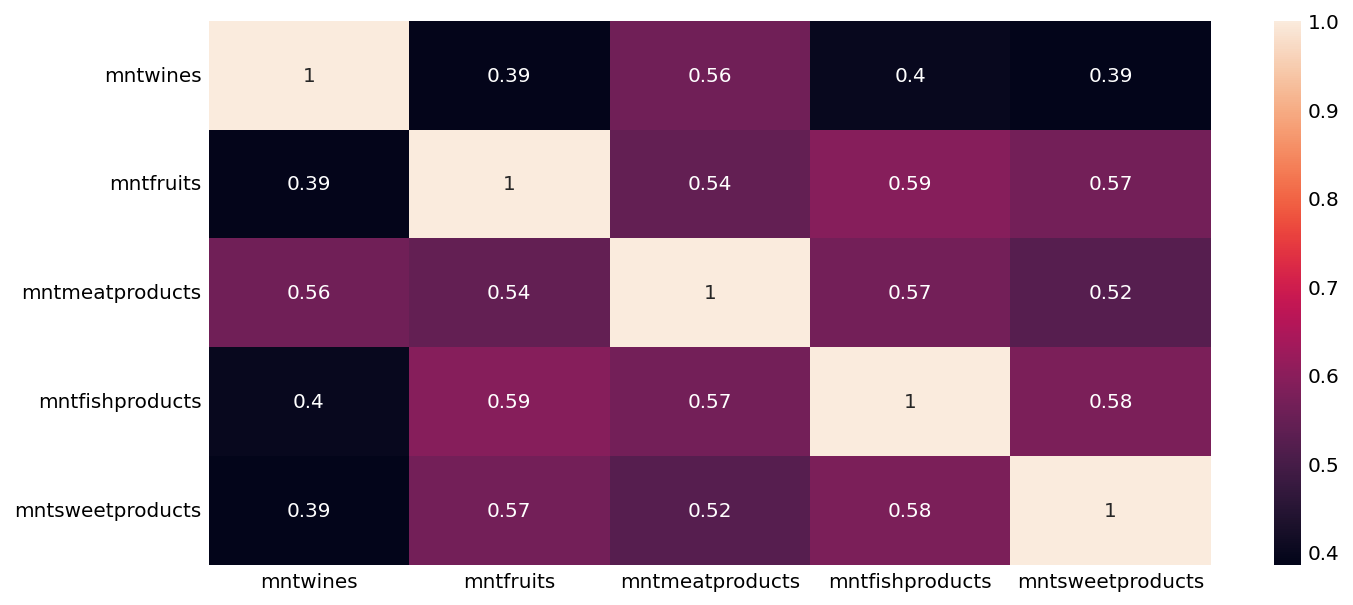

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(cp_pp.corr(), annot=True)
plt.savefig('wine&productparing.png')
plt.show()

In [102]:
#mntwines vs campaigns
cp_cmp = cp.drop(labels=['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'response', 'age'], axis=1)
cp_cmp.head()

,mntwines,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,cmpresponse,mntwinespend
0,635,0,0,0,0,0,none,3
1,11,0,0,0,0,0,none,1
2,426,0,0,0,0,0,none,2
3,11,0,0,0,0,0,none,1
4,173,0,0,0,0,0,none,2


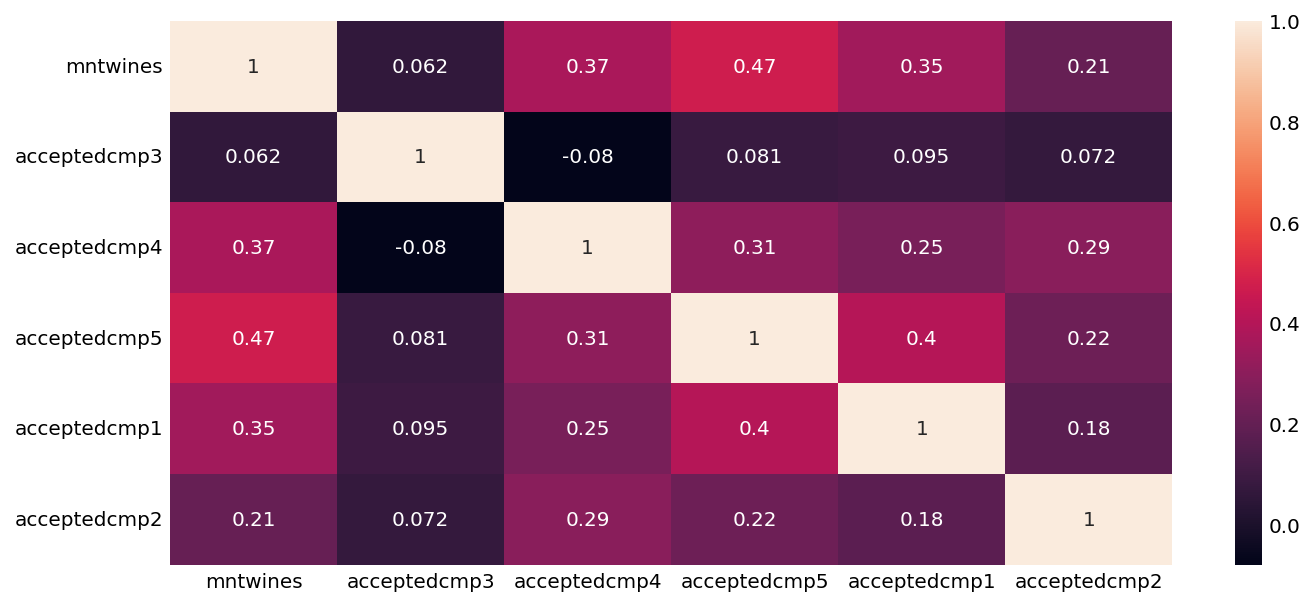

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(cp_cmp.corr(), annot=True)
plt.savefig('wine&cmp.png')
plt.show()

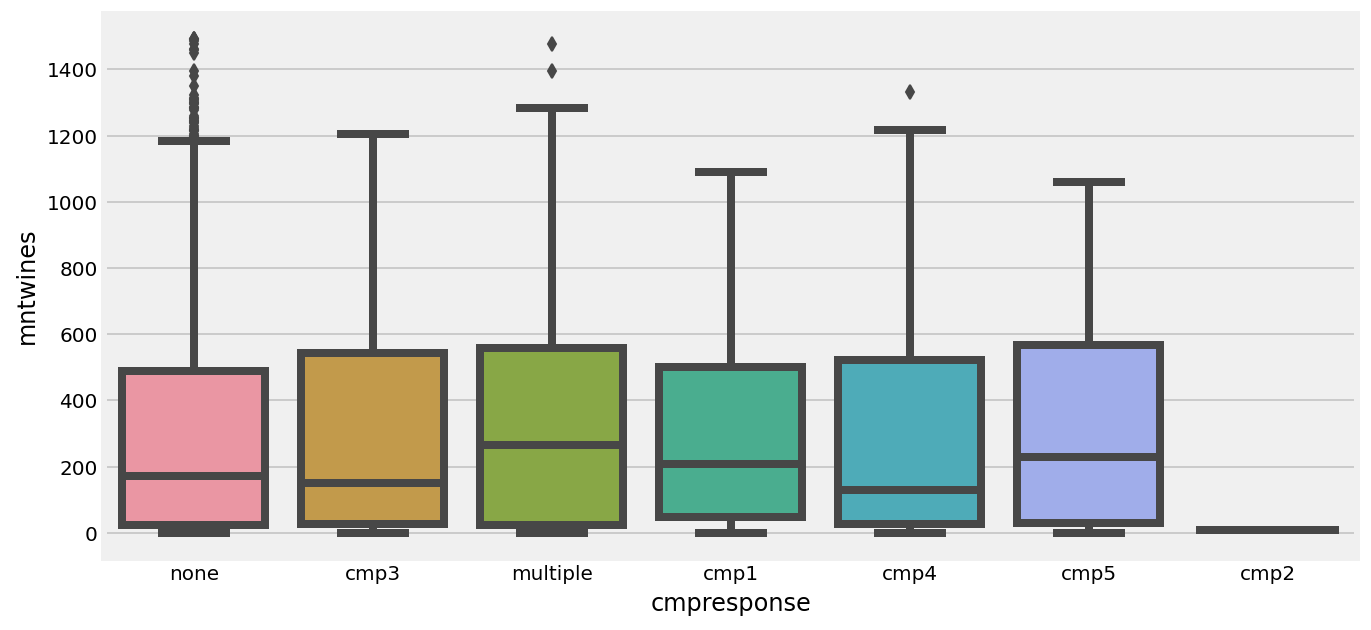

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='cmpresponse', data=cp)

plt.savefig('wine&cmpresponse.png')
plt.show()

<Figure size 720x576 with 0 Axes>

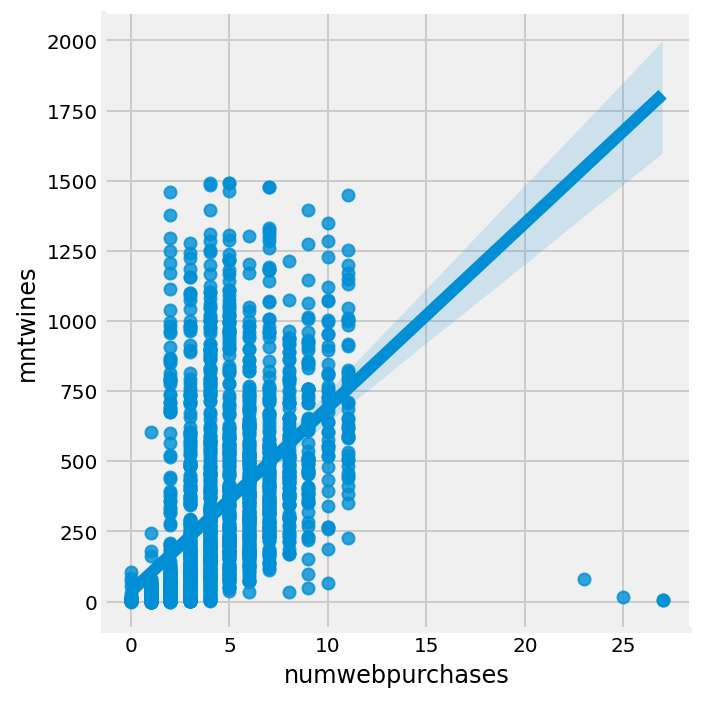

In [105]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numwebpurchases', y='mntwines', data=cp);
plt.savefig('webpurs&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

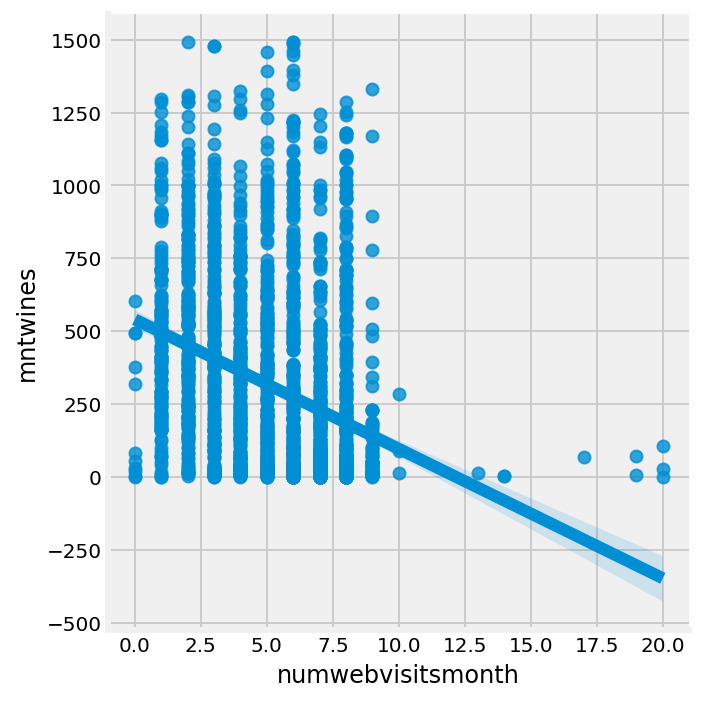

In [106]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numwebvisitsmonth', y='mntwines', data=cp);
plt.savefig('webvisits&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

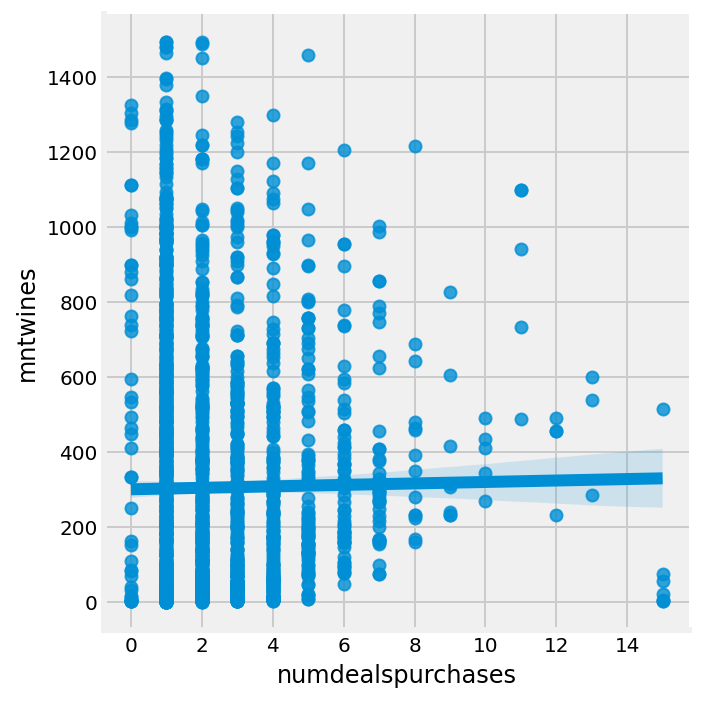

In [107]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numdealspurchases', y='mntwines', data=cp);
plt.savefig('dealpurs&wine.png')
plt.show()

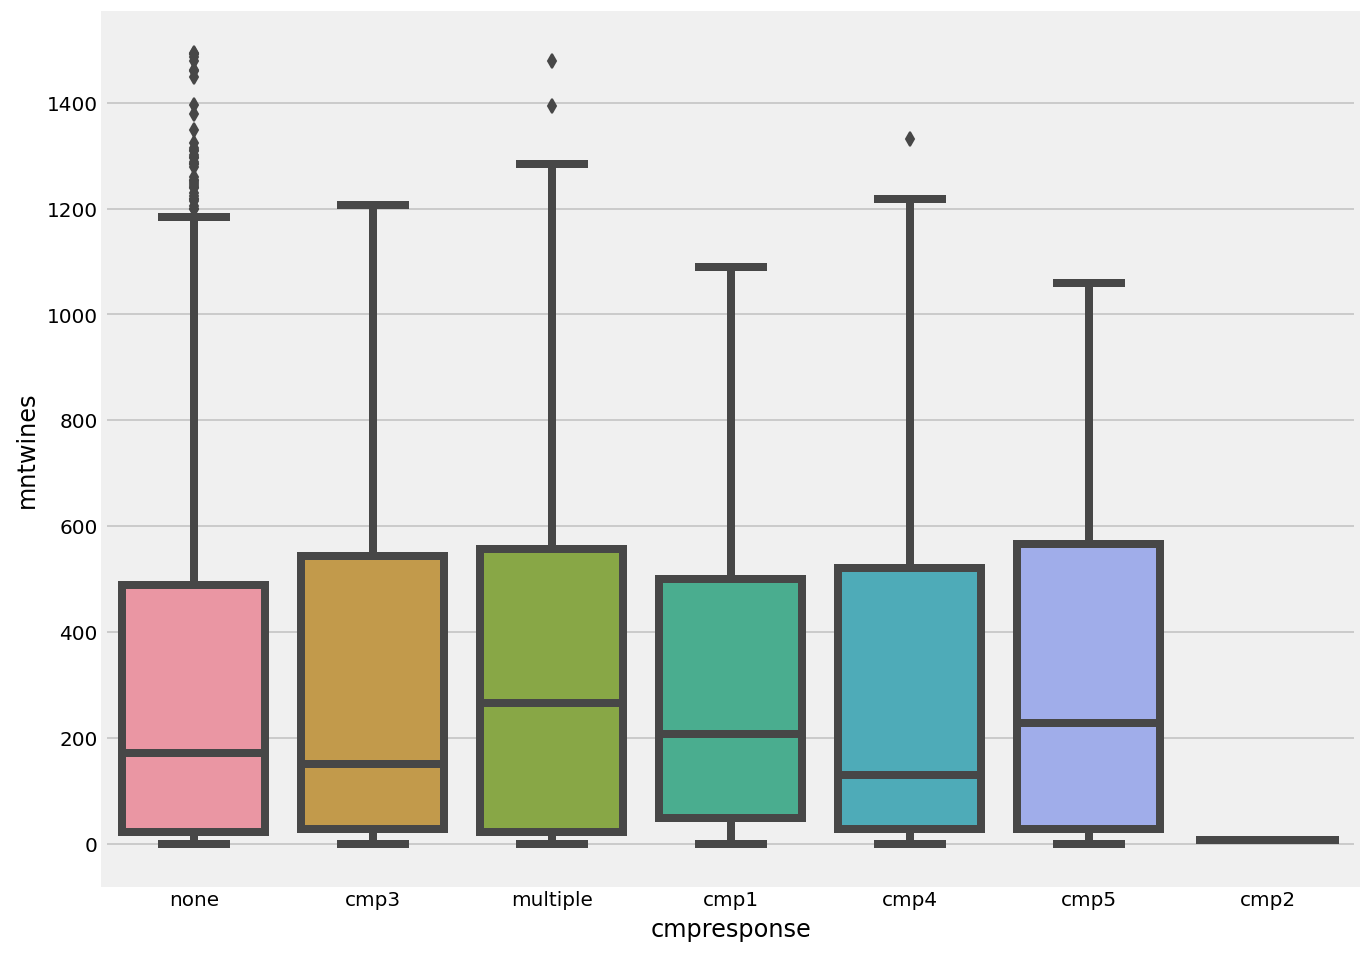

In [238]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cmpresponse', y='mntwines', data=cp);
plt.savefig('mntwinespend&cmpresponse.png')
plt.show()

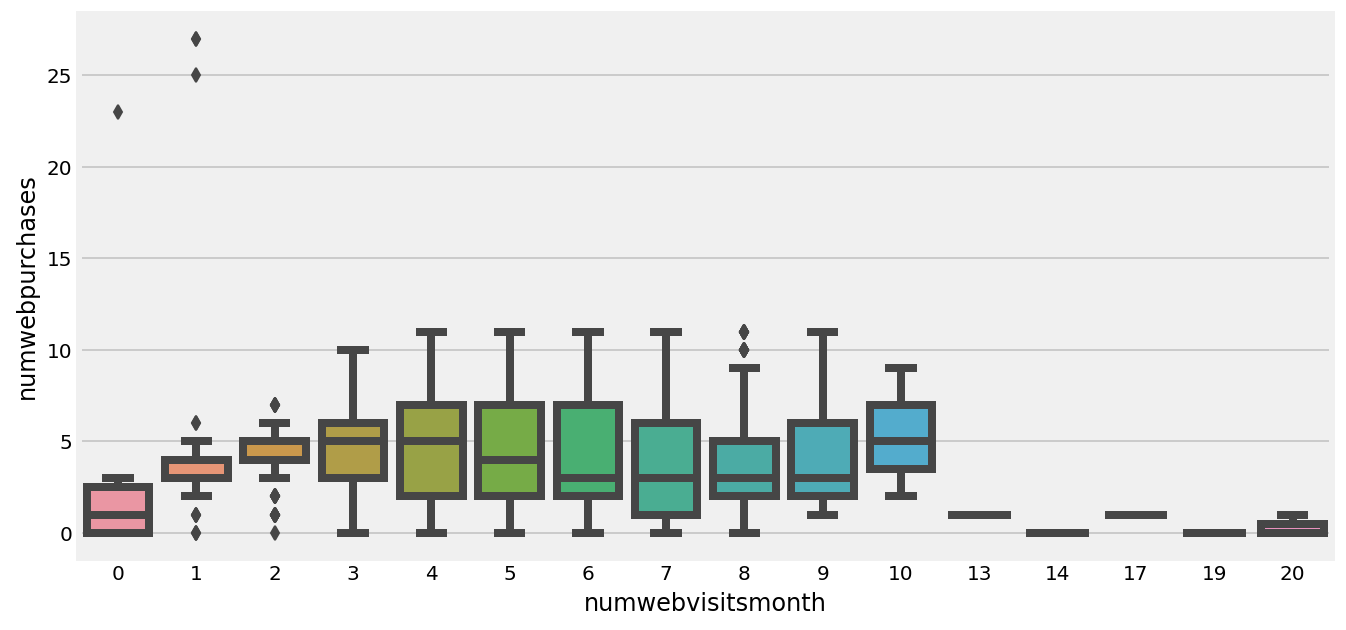

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=cp)
plt.savefig('webvisit&webpurchase.png')
plt.show()

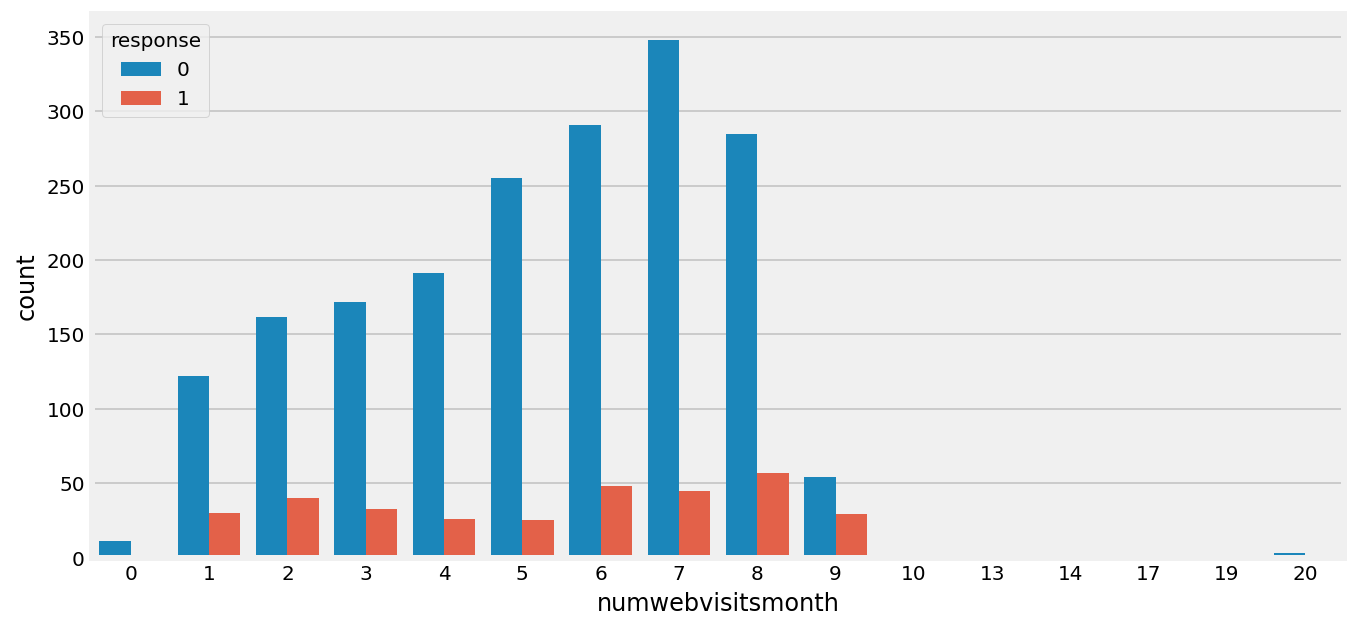

In [64]:
plt.figure(figsize=(10,5))
sns.countplot( x='numwebvisitsmonth', data=cp,hue='response')
plt.savefig('webvisit&response.png')
plt.show()

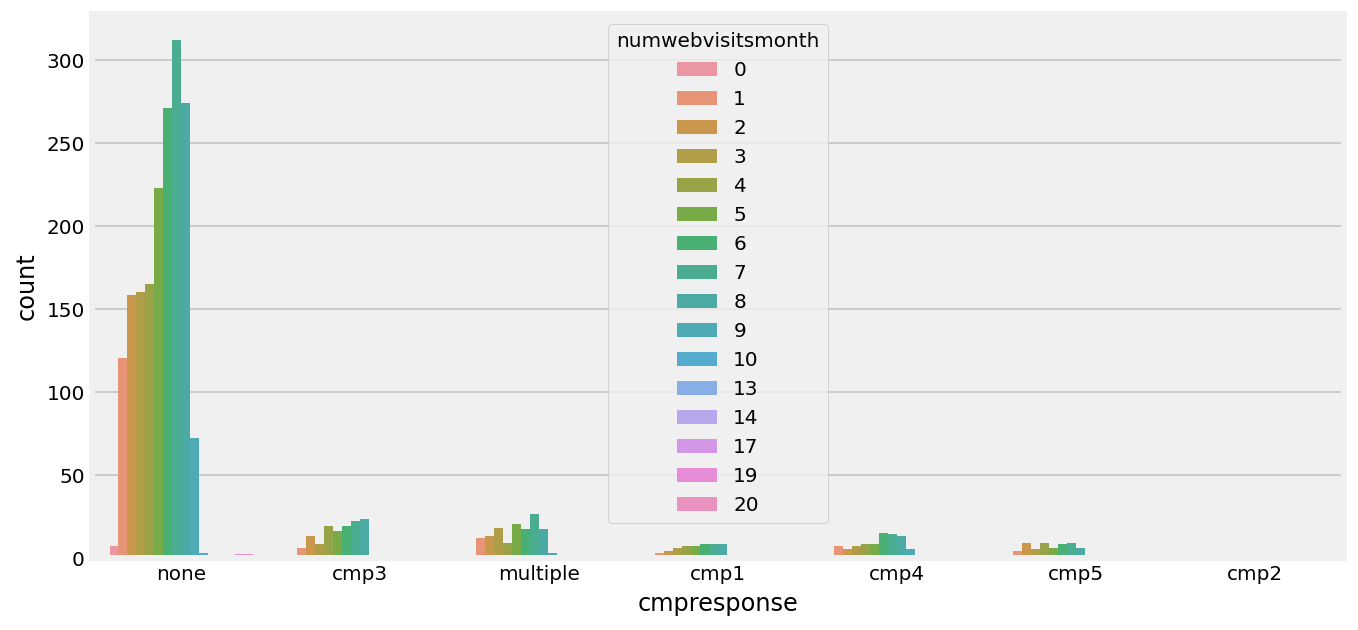

In [241]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&cmpresponse.png')
plt.show()

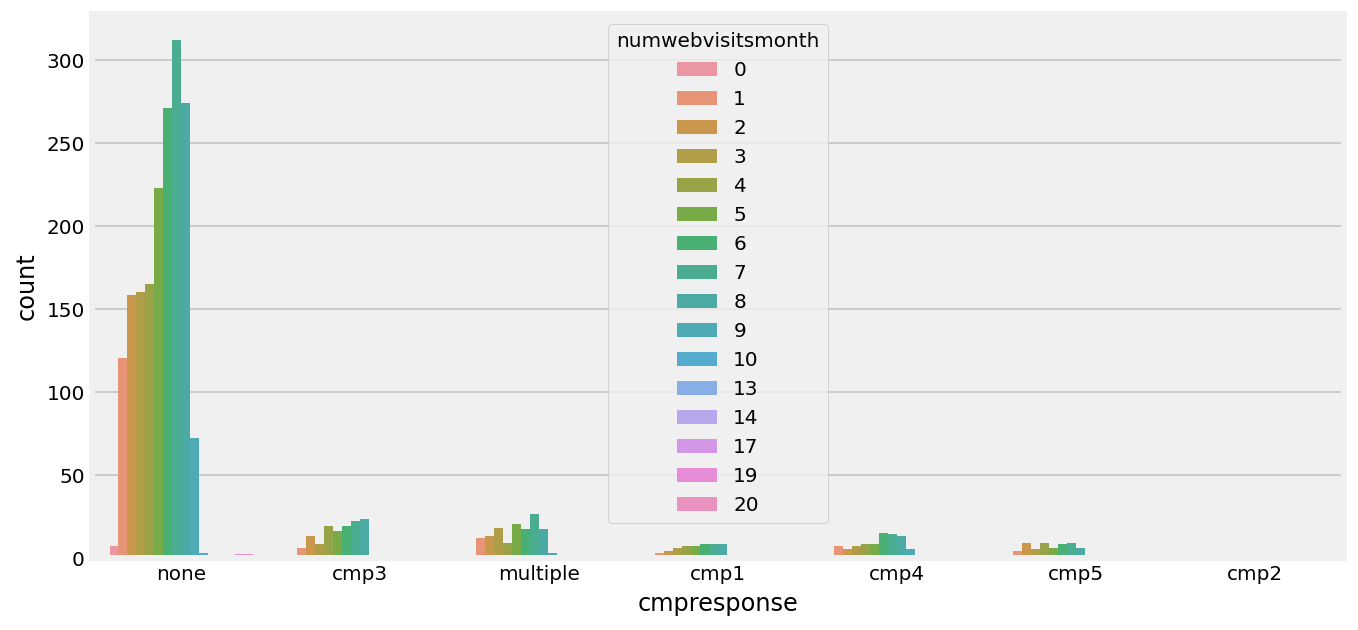

In [240]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&cmpresponse.png')
plt.show()

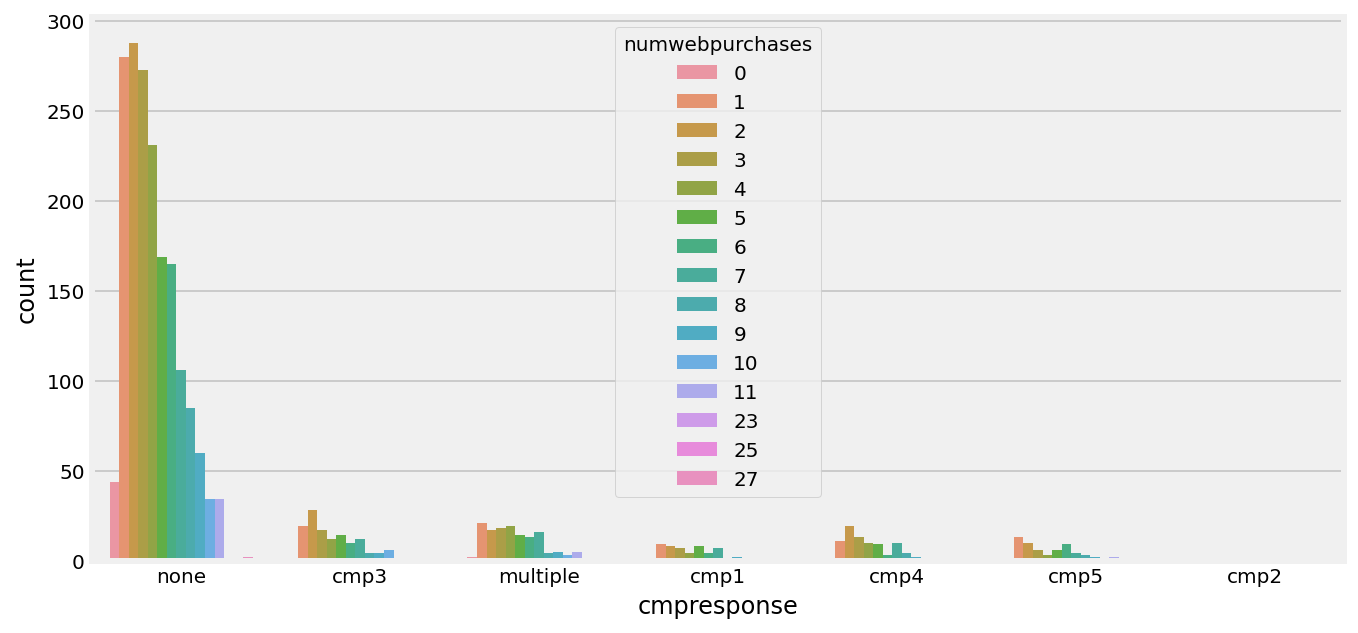

In [242]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebpurchases')
plt.savefig('webpurs&cmpresponse.png')
plt.show()

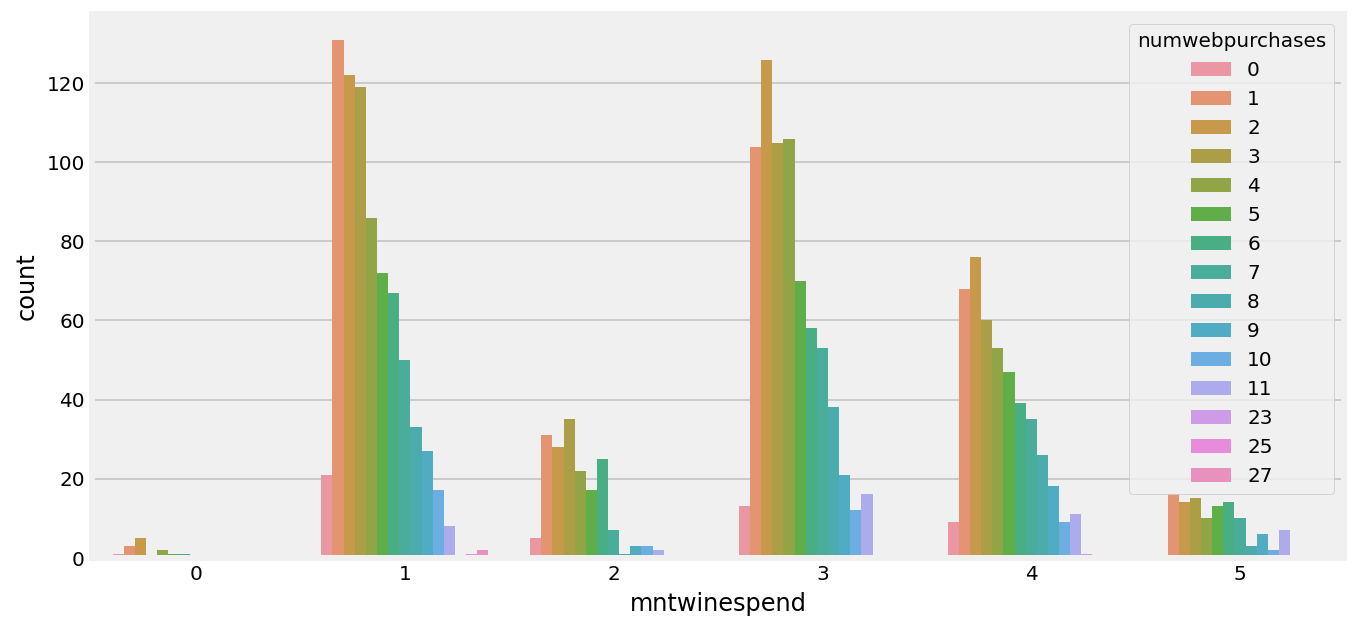

In [245]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=cp,hue='numwebpurchases')
plt.savefig('webpurs&mntwinespend.png')
plt.show()

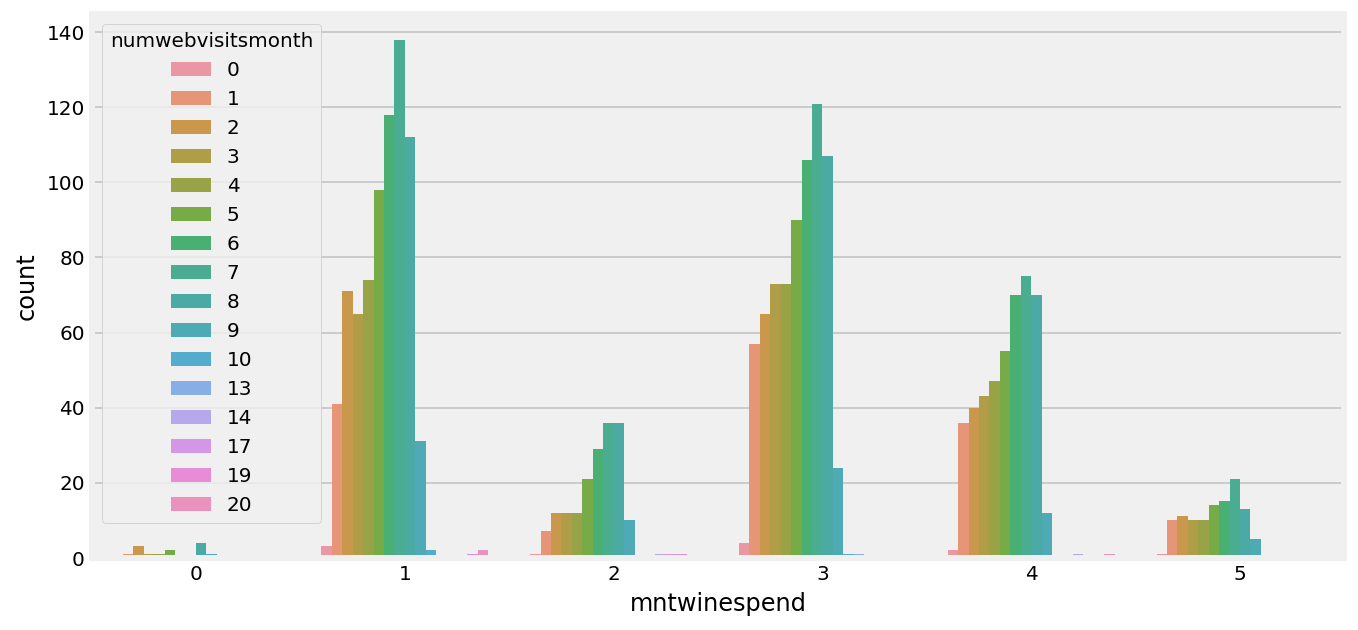

In [246]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&mntwinespend.png')
plt.show()

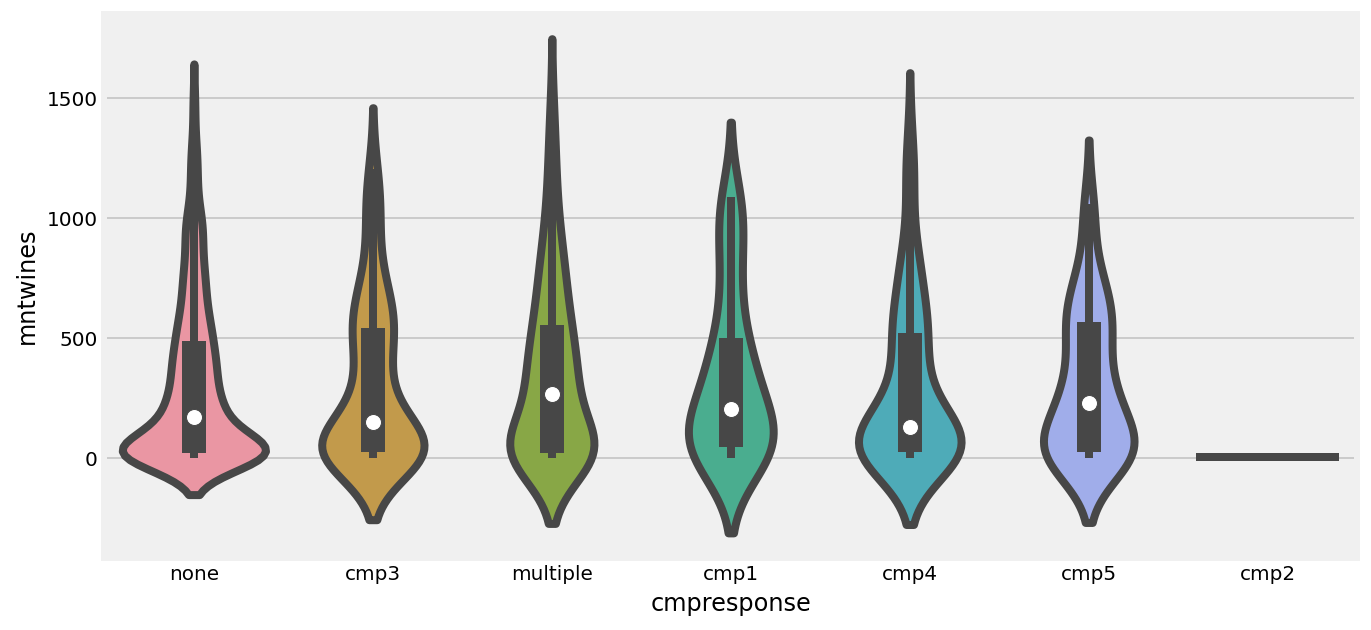

In [250]:
plt.figure(figsize=(10,5))
sns.violinplot(y='mntwines', x='cmpresponse', data=cp)
plt.savefig('cmpresponse&mntwines.png')
plt.show()

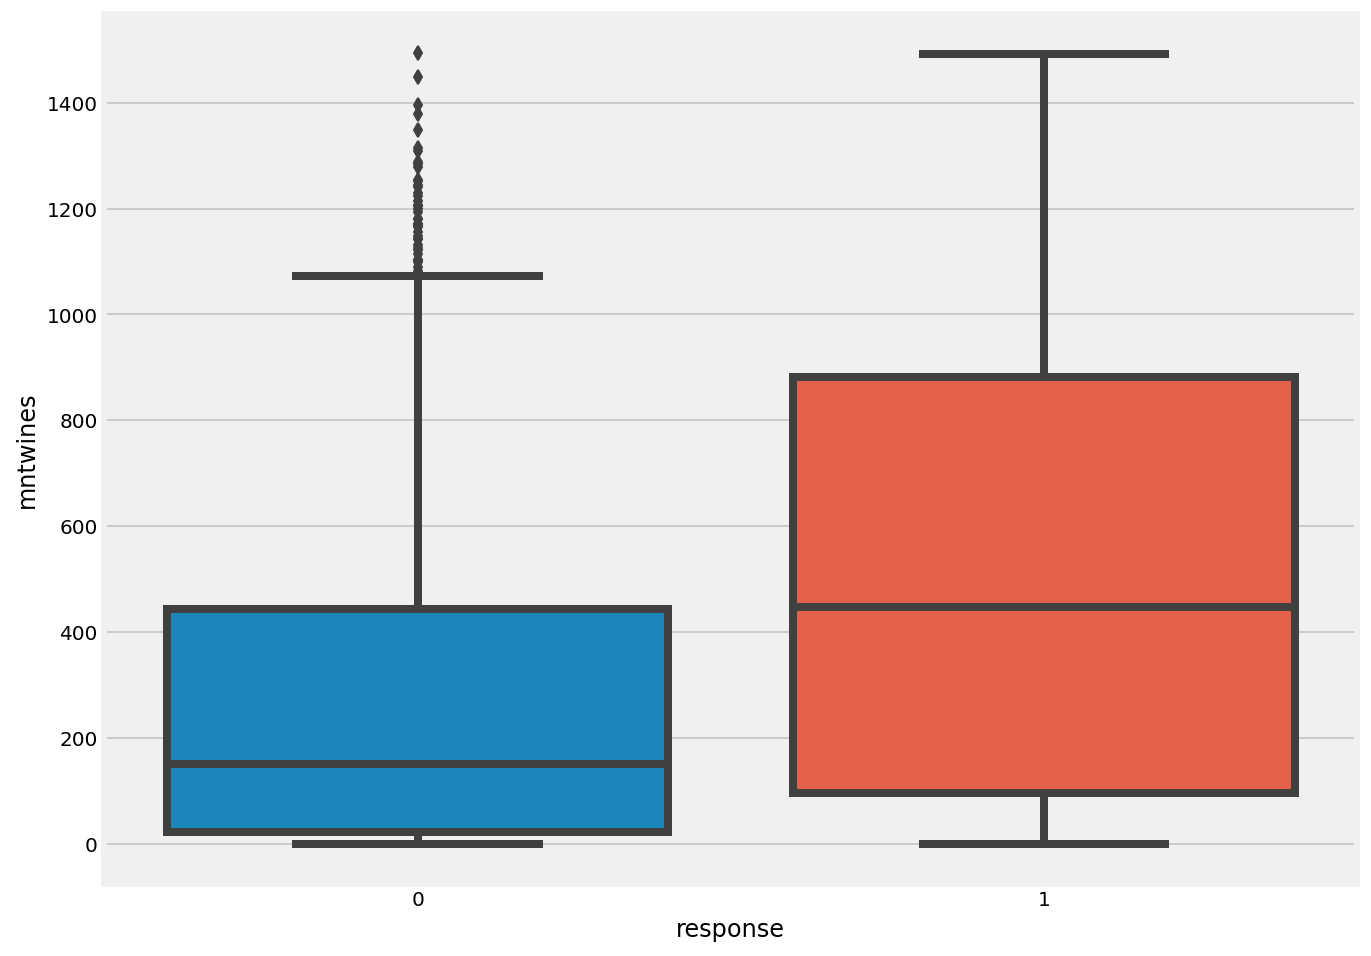

In [283]:
plt.figure(figsize=(10,8))
sns.boxplot(x='response', y='mntwines', data=cp);
plt.savefig('mntwines&response.png')
plt.show()

# Now we want to compare personality of customers who responsed to current campaigns versus those who didn't

In [266]:
cp.cmpresponse.value_counts(normalize=True)

none        0.793907
multiple    0.061380
cmp3        0.057796
cmp4        0.037186
cmp5        0.025986
cmp1        0.023297
cmp2        0.000448
Name: cmpresponse, dtype: float64

In [270]:
noresponse = cp.loc[cp['cmpresponse']=='none']
noresponse.shape

(1772, 27)

In [273]:
responsed = cp.loc[cp['cmpresponse']!='none']
responsed.shape

(460, 27)

In [275]:
noresponse.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1772.0,51680.676354,21219.467568,1730.0,35233.5,51342.0,67445.0,162397.0
kidhome,1772.0,0.450903,0.541204,0.0,0.0,0.0,1.0,2.0
teenhome,1772.0,0.514673,0.546339,0.0,0.0,0.0,1.0,2.0
recency,1772.0,48.931151,28.958328,0.0,24.0,49.0,74.0,99.0
mntwines,1772.0,300.014108,335.831475,0.0,23.0,172.0,489.5,1493.0
mntfruits,1772.0,26.021445,39.658019,0.0,1.0,8.0,33.0,199.0
mntmeatproducts,1772.0,163.865124,223.133332,1.0,16.0,65.0,223.0,1725.0
mntfishproducts,1772.0,36.303612,53.595409,0.0,2.0,12.0,46.0,259.0
mntsweetproducts,1772.0,26.954289,41.499732,0.0,1.0,8.0,33.0,263.0
mntgoldprods,1772.0,43.143905,51.037416,0.0,8.0,24.0,56.0,362.0


# Web purchases vs web visits

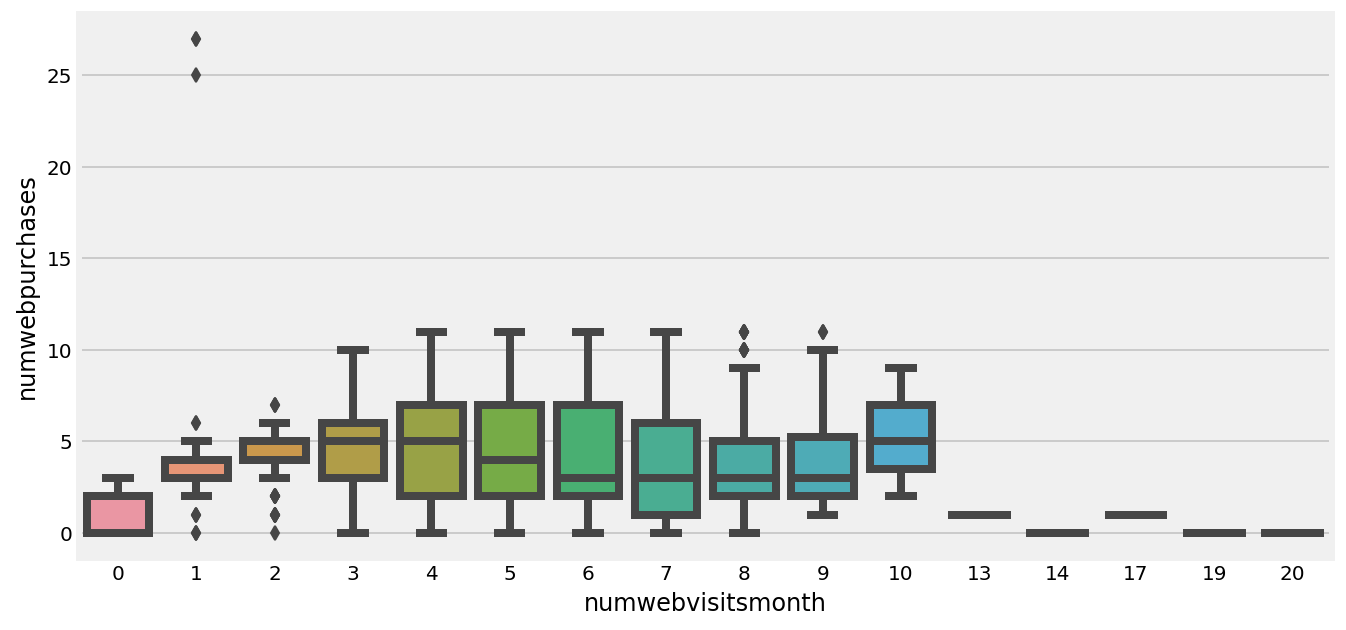

In [277]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=noresponse)
plt.savefig('noresponse_webvisit&webpurchase.png')
plt.show()

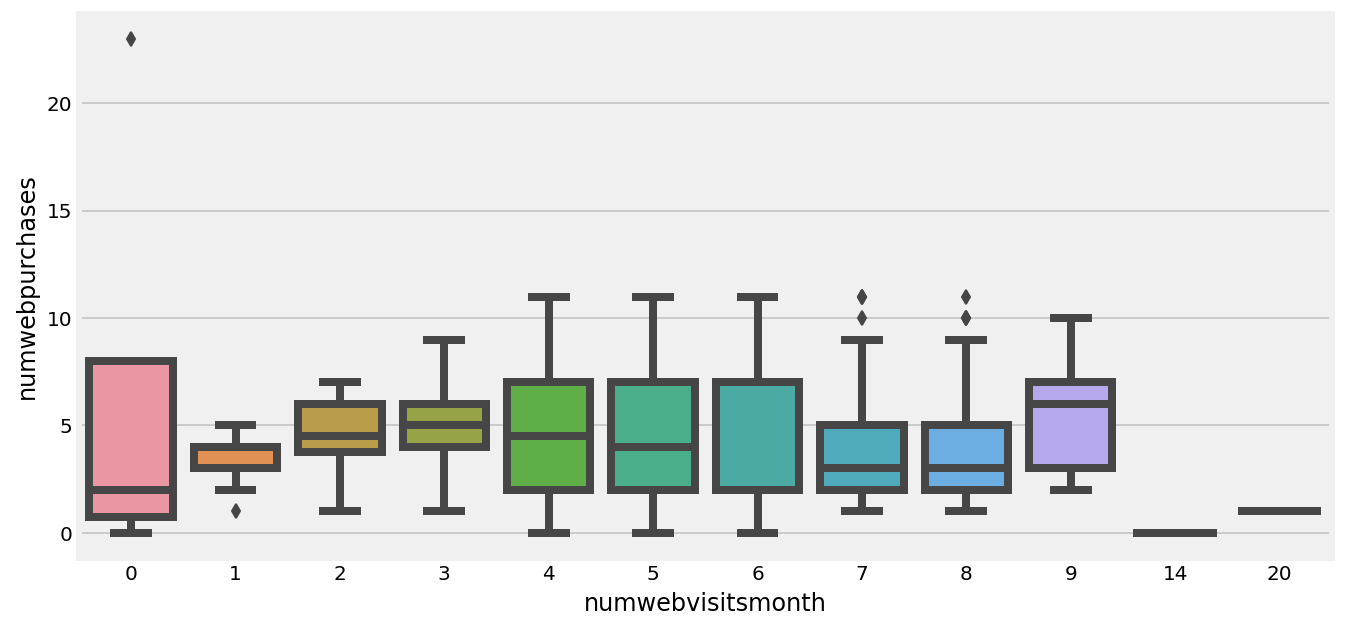

In [298]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=responsed)
plt.savefig('responsed_webvisit&webpurchase.png')
plt.show()

# Amount spend on wines in range

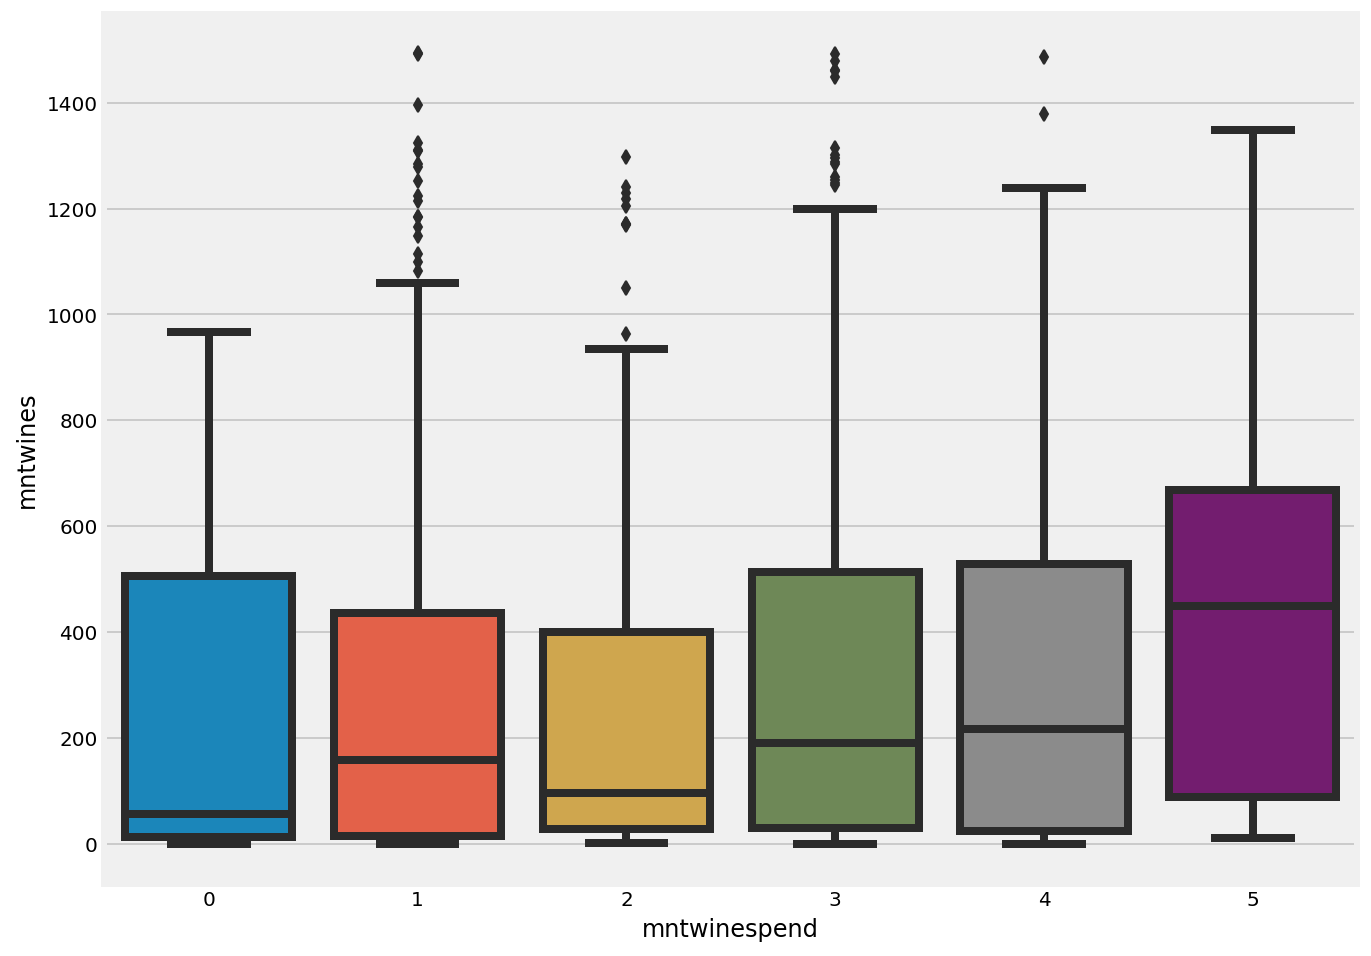

In [300]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='mntwines', data=noresponse);
plt.savefig('noresponse_mntwinespend&mntwines.png')
plt.show()

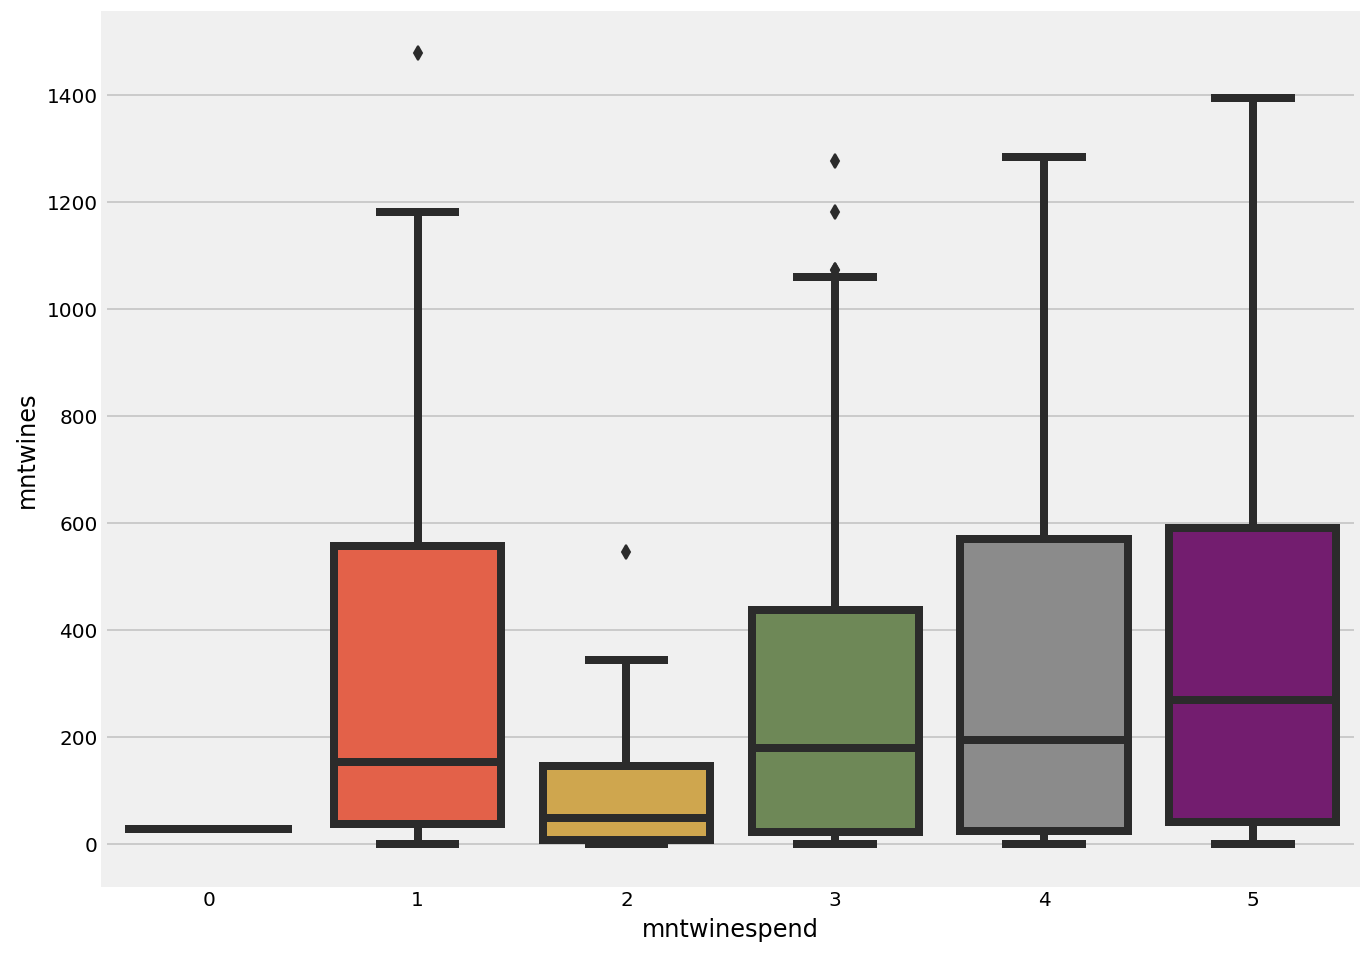

In [299]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='mntwines', data=responsed);
plt.savefig('responsed_mntwinespend&mntwines.png')
plt.show()

# Amount spend on wines versus complain 

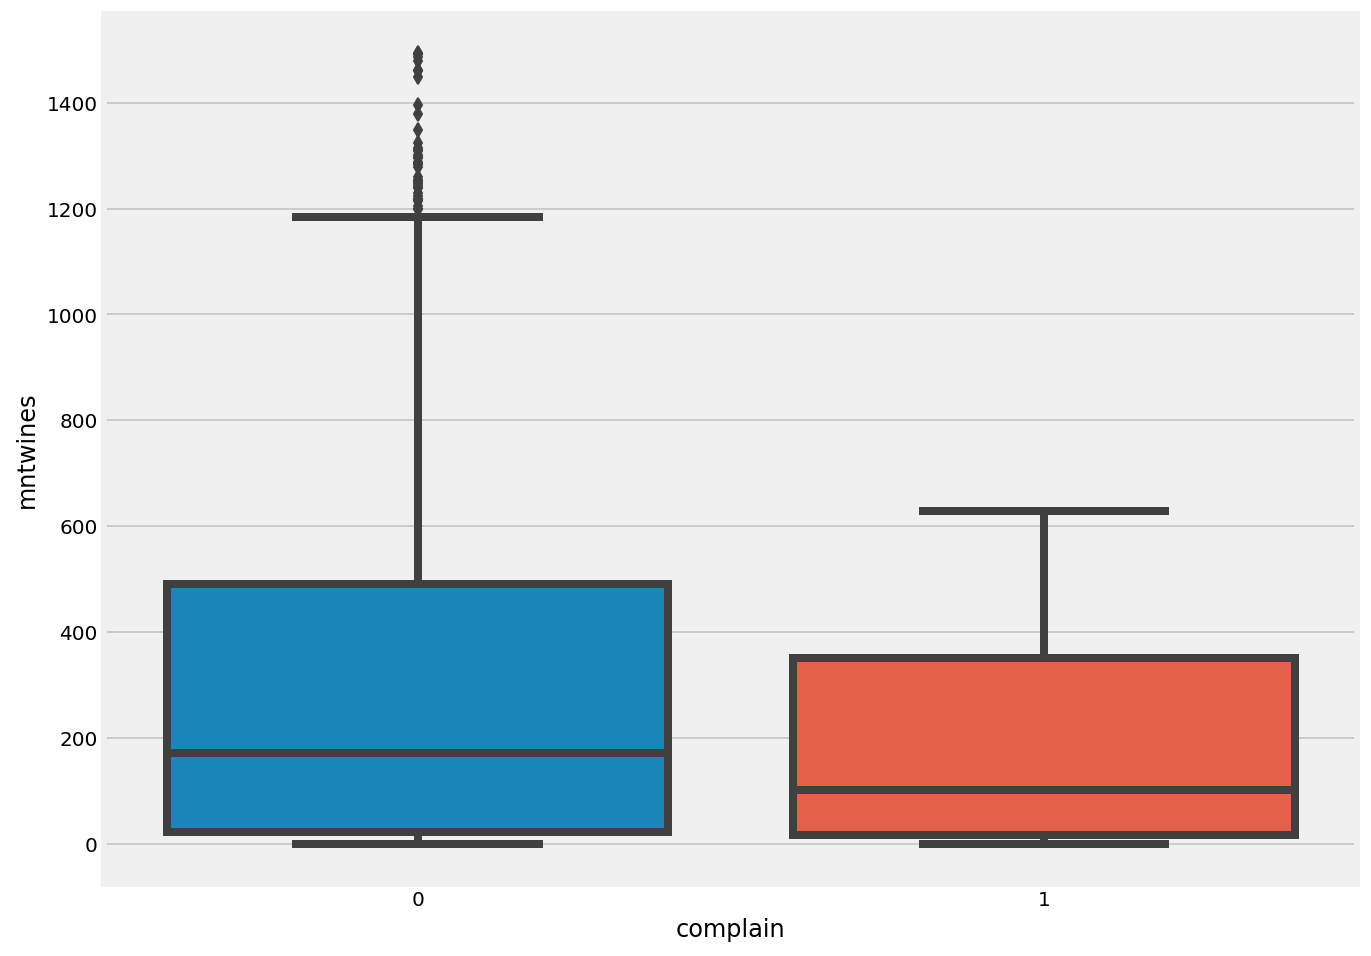

In [285]:
plt.figure(figsize=(10,8))
sns.boxplot(x='complain', y='mntwines', data=noresponse);
plt.savefig('noresponse_mntwines&complain.png')
plt.show()

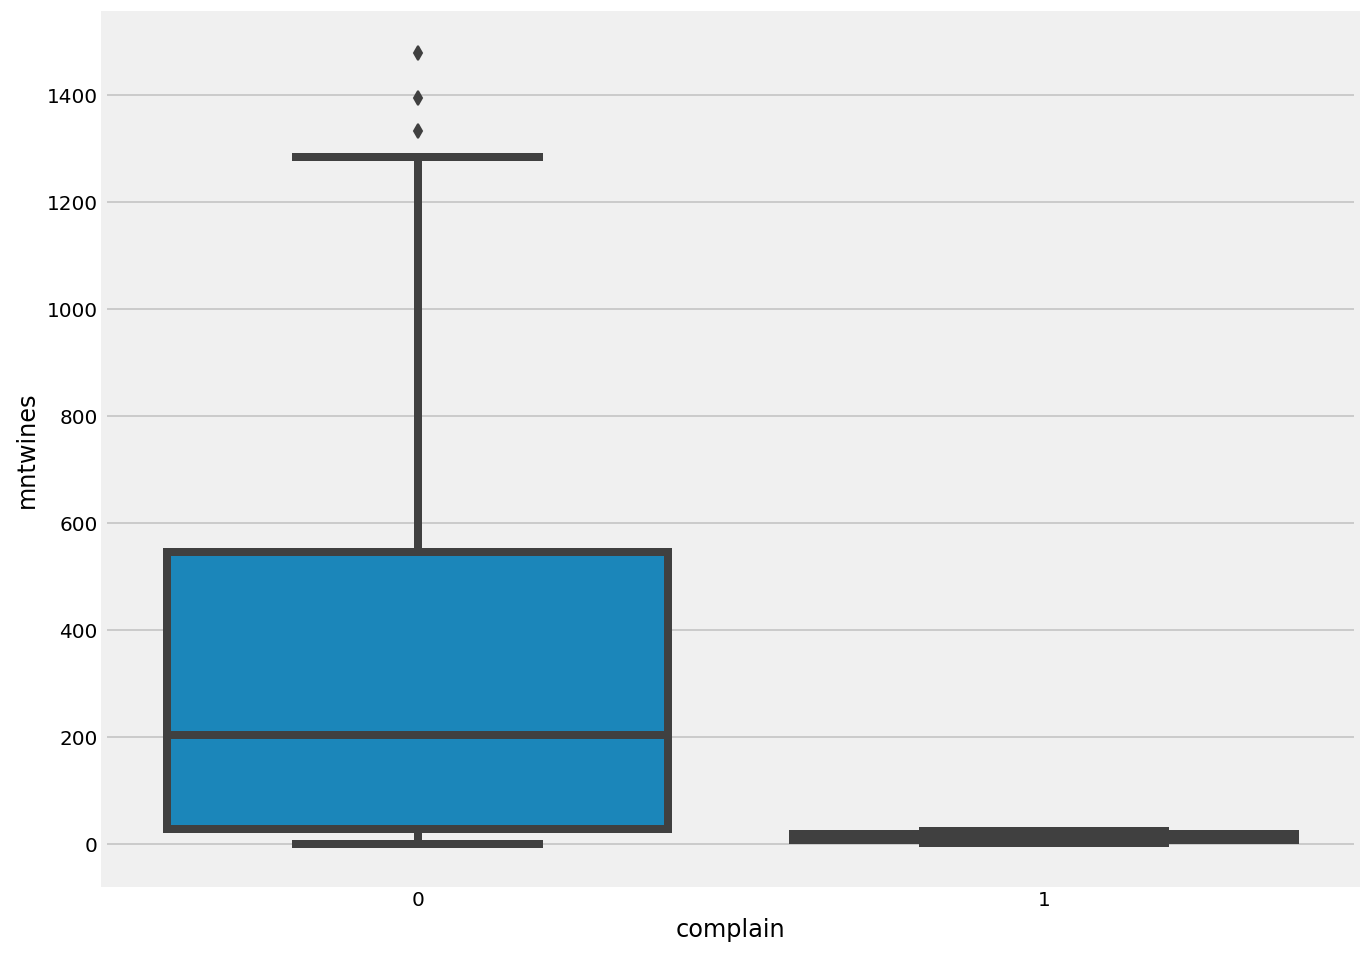

In [286]:
plt.figure(figsize=(10,8))
sns.boxplot(x='complain', y='mntwines', data=responsed);
plt.savefig('responsed_mntwines&complain.png')
plt.show()

# Web purchases & amount spend on wines

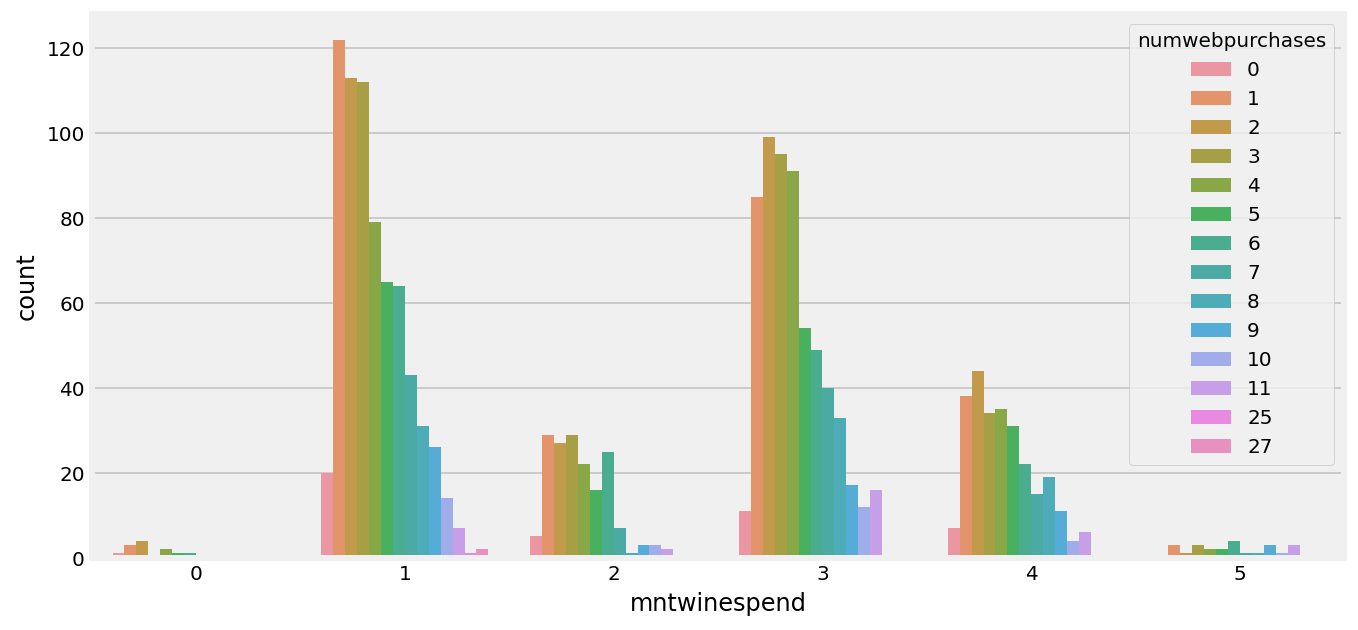

In [288]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=noresponse,hue='numwebpurchases')
plt.savefig('noresponse_webpurs&mntwinespend.png')
plt.show()

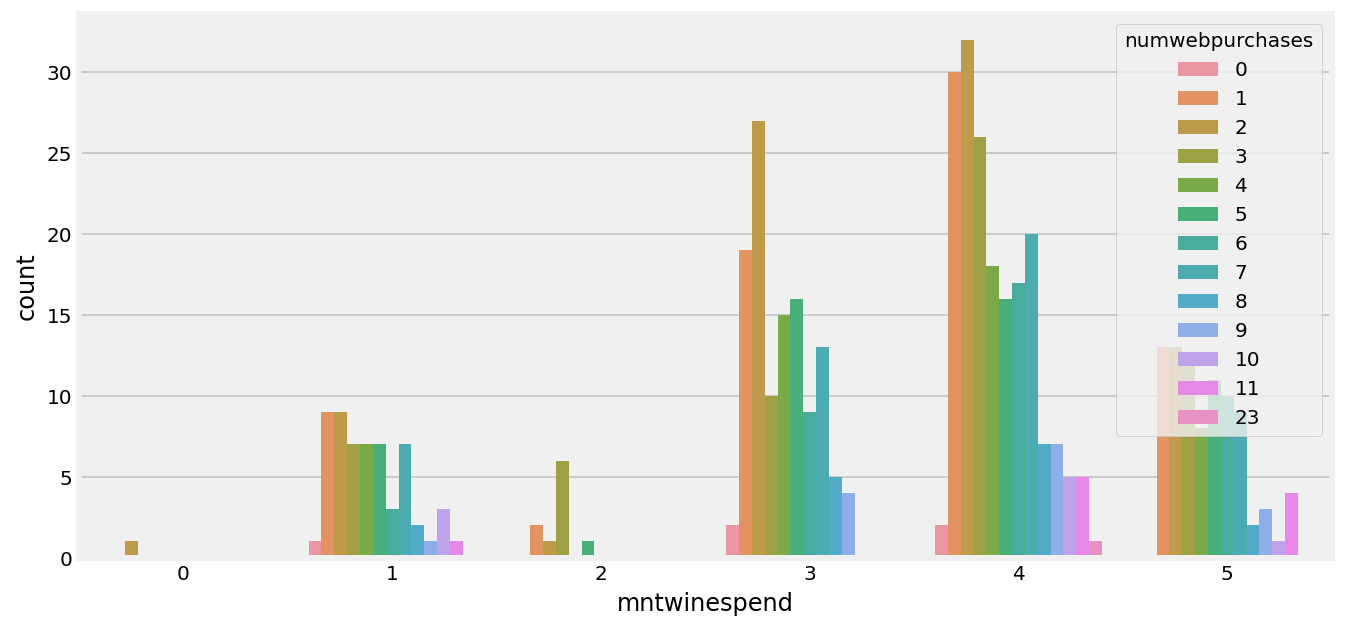

In [301]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=responsed,hue='numwebpurchases')
plt.savefig('responsed_webpurs&mntwinespend.png')
plt.show()

# Education & amount spend on wines

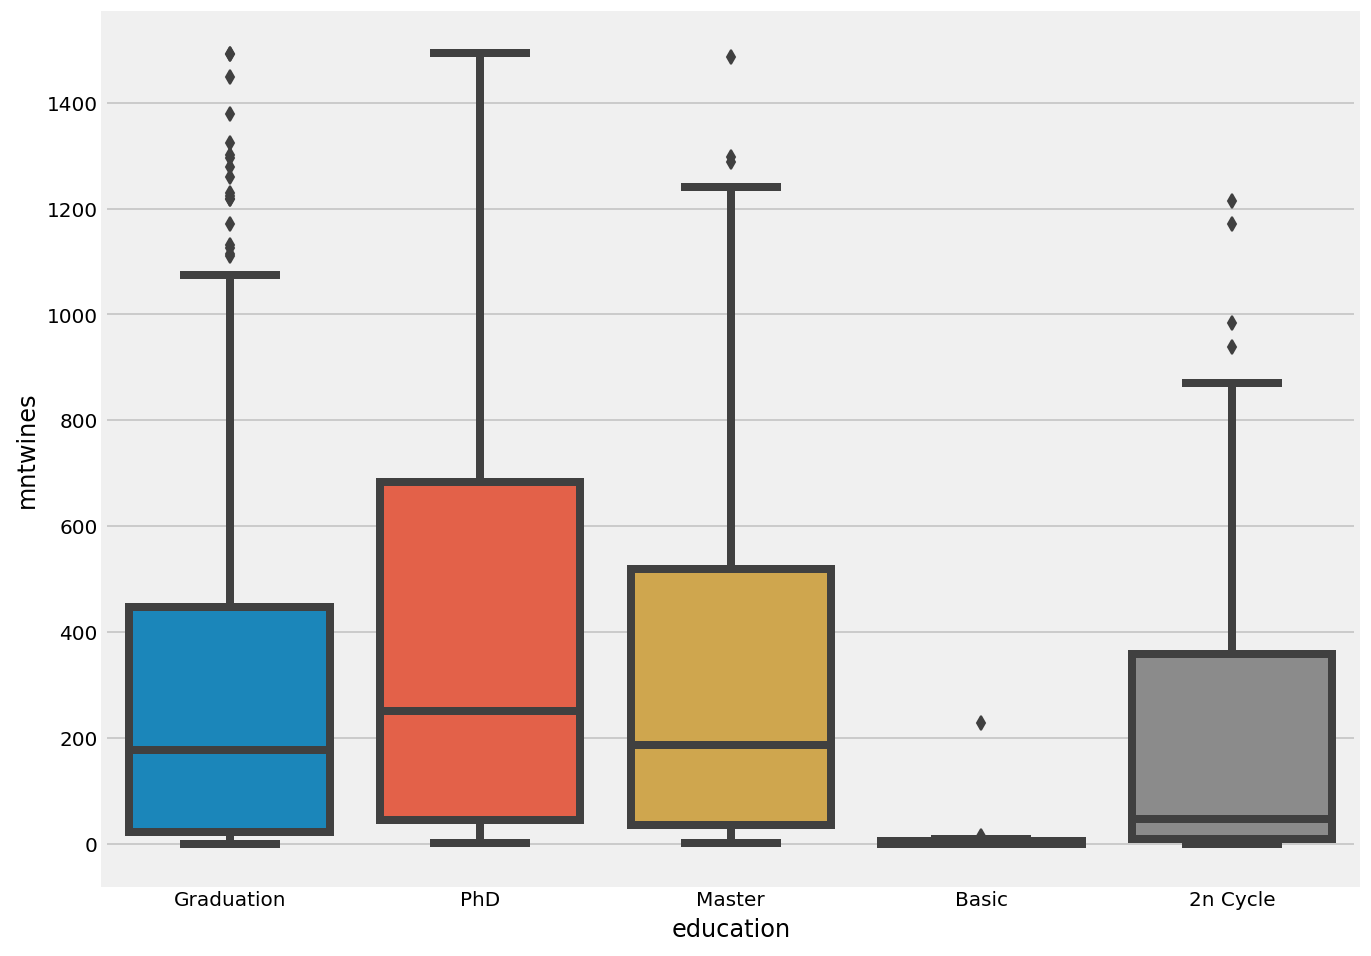

In [294]:
plt.figure(figsize=(10,8))
sns.boxplot(x='education', y='mntwines', data=noresponse);
plt.savefig('noresponse_education&mntwines.png')
plt.show()

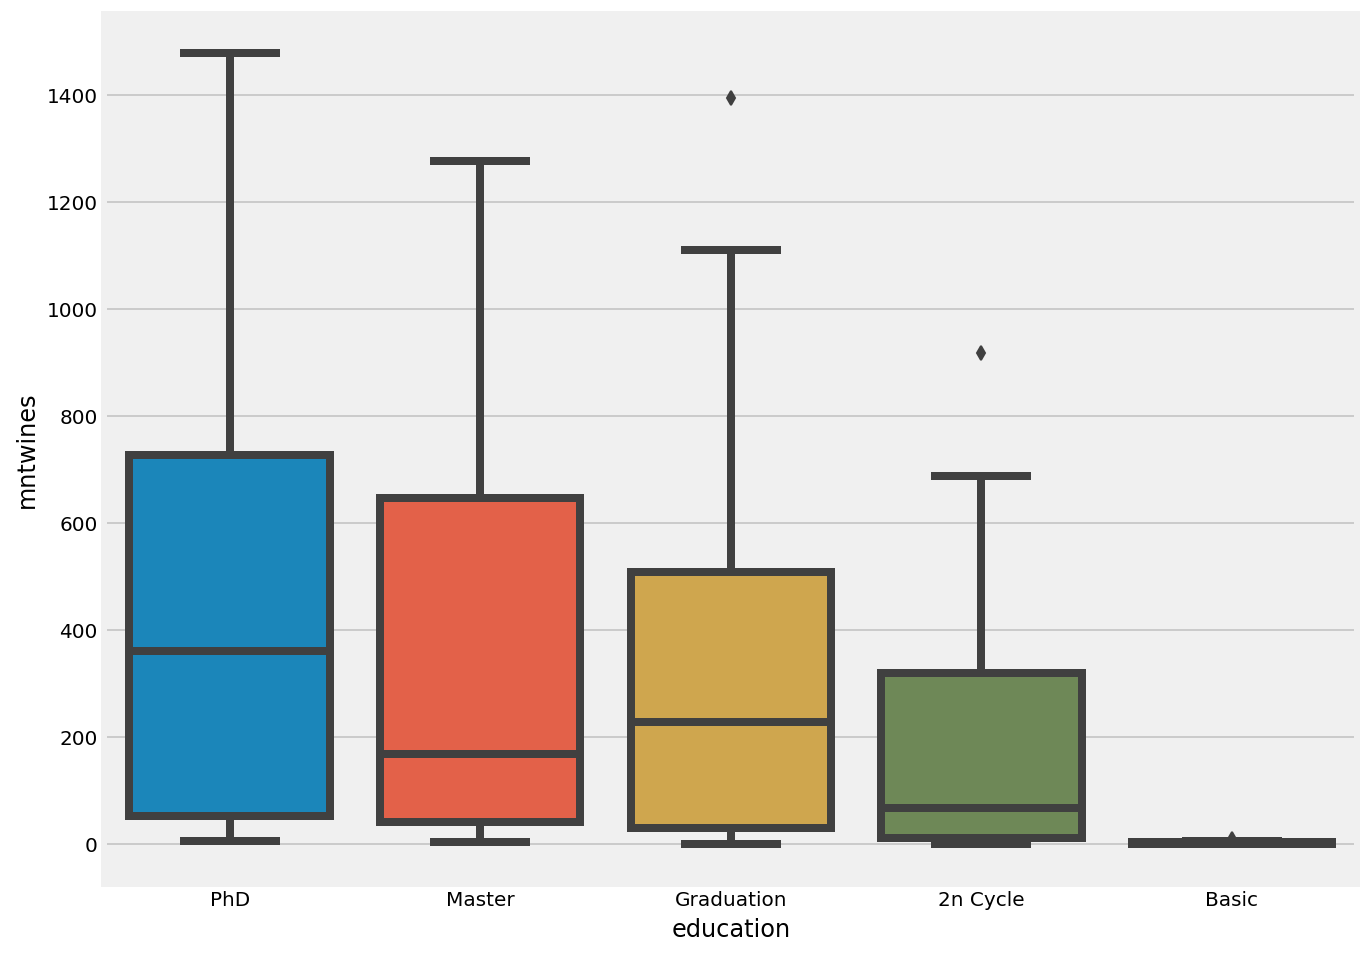

In [302]:
plt.figure(figsize=(10,8))
sns.boxplot(x='education', y='mntwines', data=responsed);
plt.savefig('responsed_education&mntwines.png')
plt.show()

# Marital status & amount spend on wines

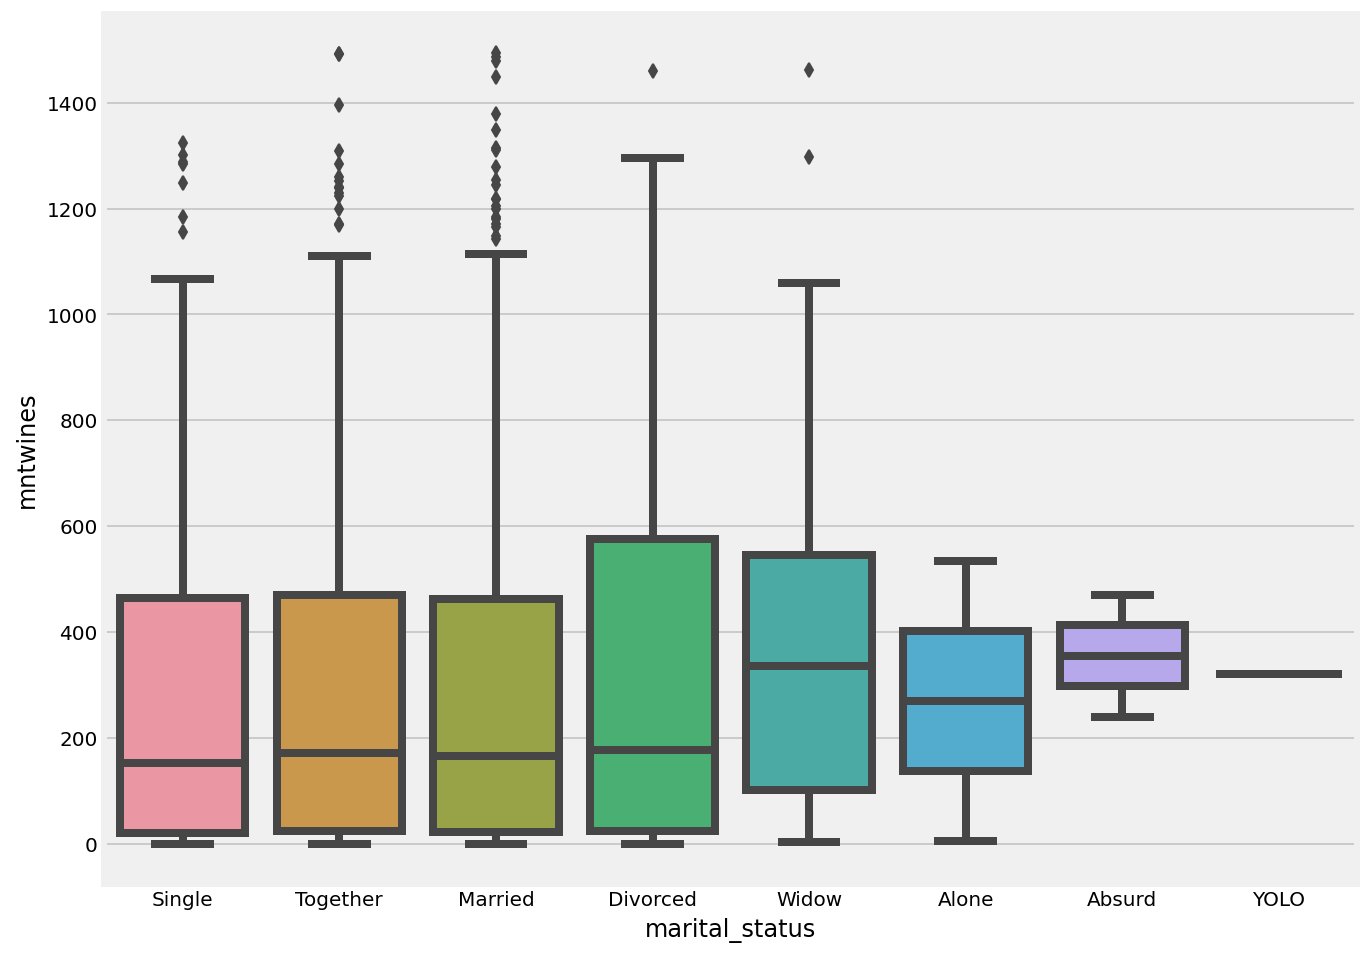

In [295]:
plt.figure(figsize=(10,8))
sns.boxplot(x='marital_status', y='mntwines', data=noresponse);
plt.savefig('noresponse_marital_status&mntwines.png')
plt.show()

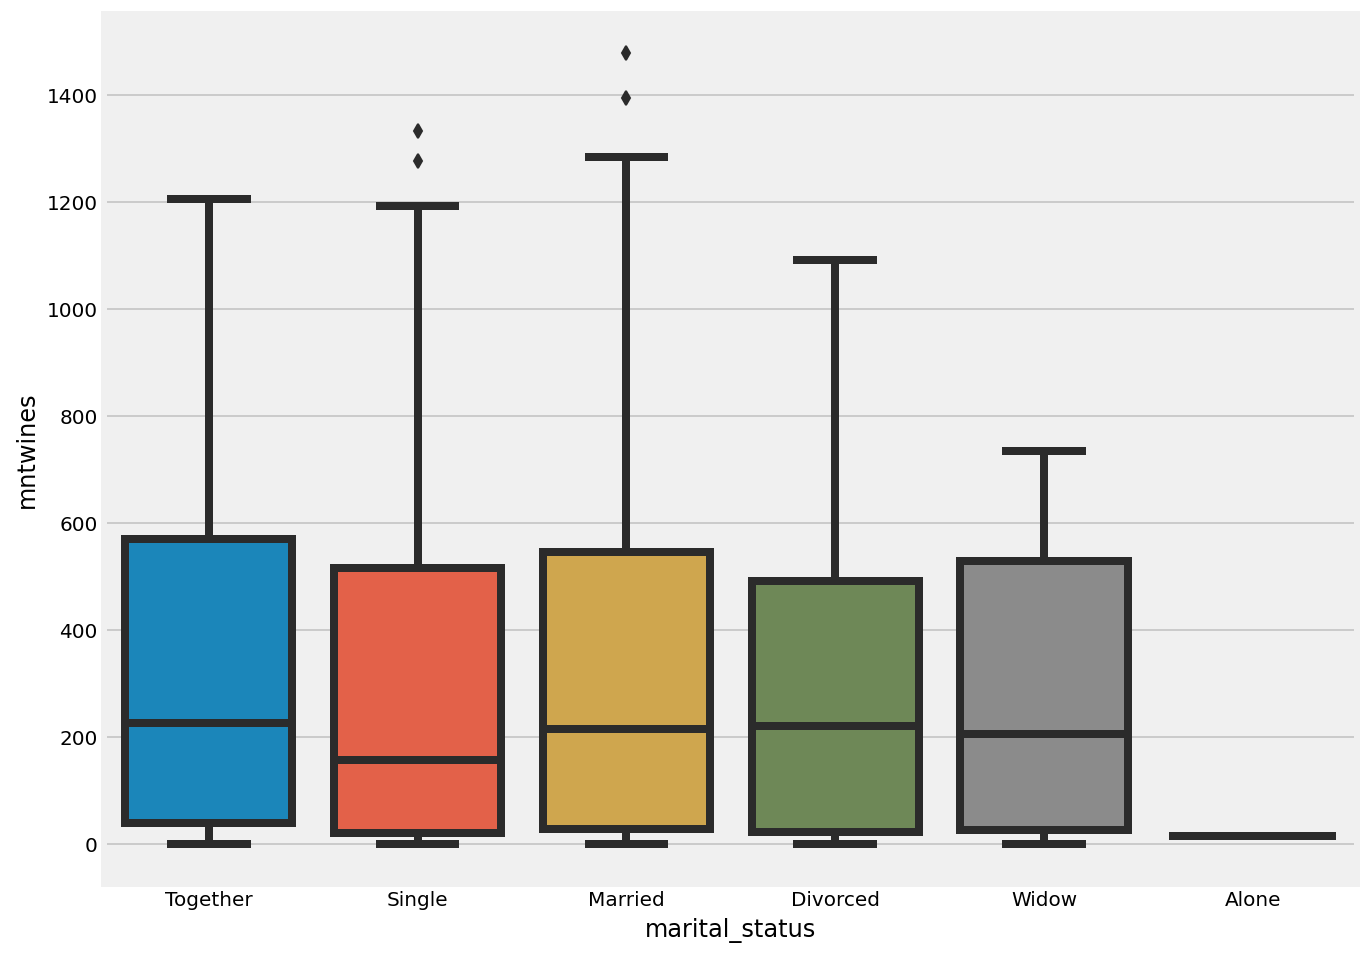

In [303]:
plt.figure(figsize=(10,8))
sns.boxplot(x='marital_status', y='mntwines', data=responsed);
plt.savefig('responsed_marital_status&mntwines.png')
plt.show()

# Number of kids & amount spend on wines

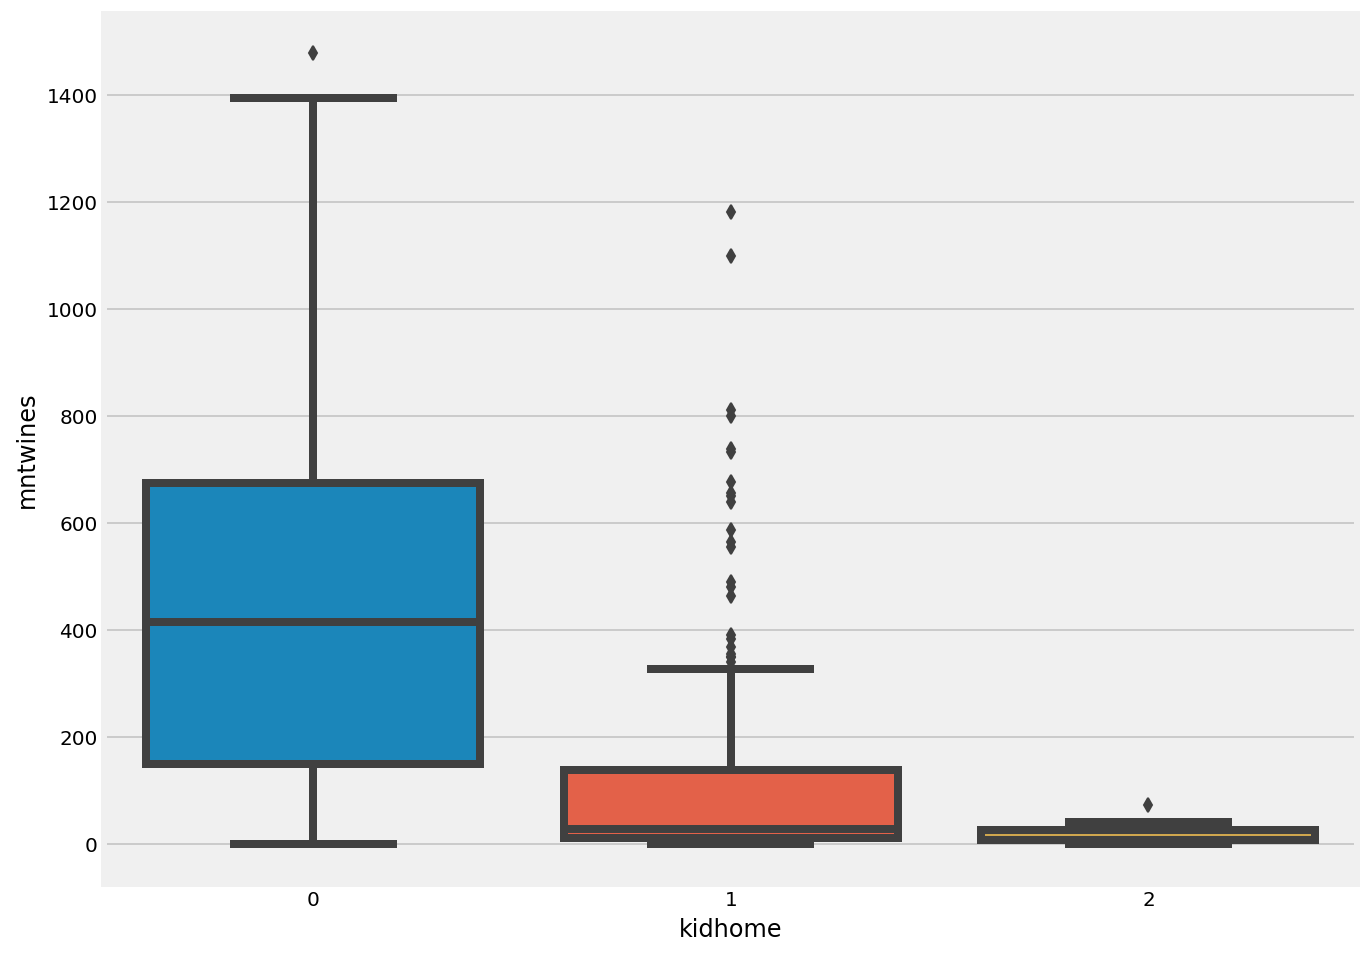

In [305]:
plt.figure(figsize=(10,8))
sns.boxplot(x='kidhome', y='mntwines', data=responsed);
plt.savefig('responsed_kidhome&mntwines.png')
plt.show()

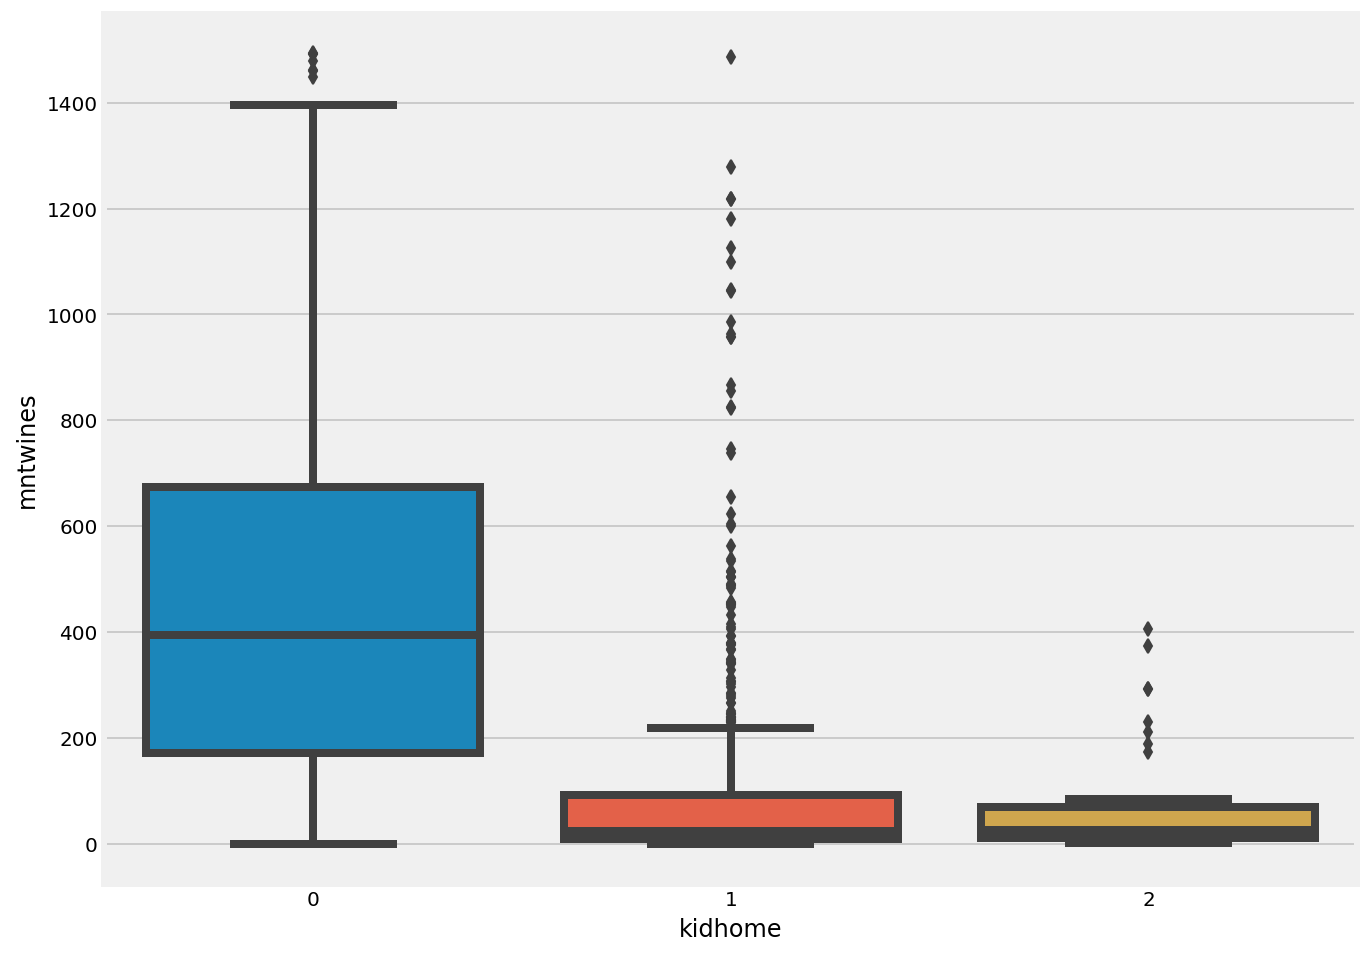

In [306]:
plt.figure(figsize=(10,8))
sns.boxplot(x='kidhome', y='mntwines', data=noresponse);
plt.savefig('noresponse_kidhome&mntwines.png')
plt.show()

# Income & amount spend on wines

<Figure size 720x576 with 0 Axes>

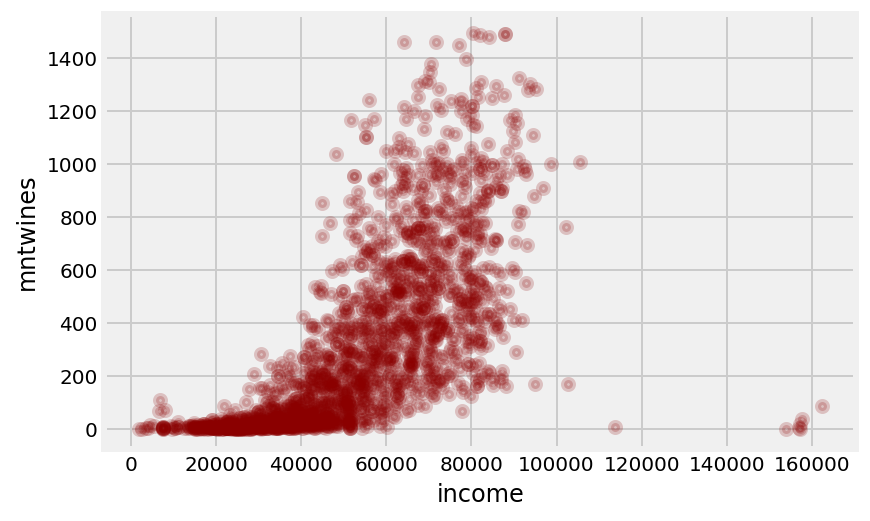

In [297]:
plt.figure(figsize=(10,8))
noresponse.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('noresponse_income&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

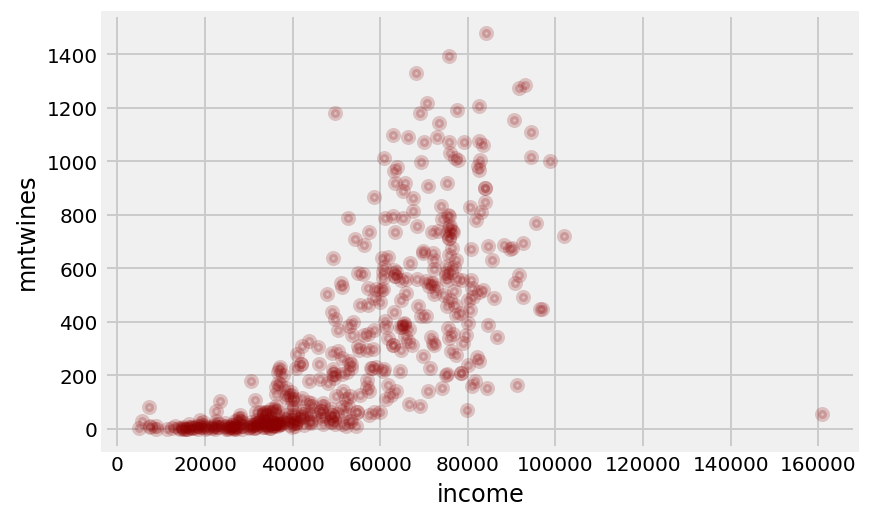

In [304]:
plt.figure(figsize=(10,8))
responsed.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('responsed_income&wine.png')
plt.show()

# Final touch to the dataset before modelling

We'll convert education value into numeric

In [308]:
cpnew = cp

In [309]:
cpnew.education.value_counts()

Graduation    1125
PhD            483
Master         369
2n Cycle       201
Basic           54
Name: education, dtype: int64

In [310]:
#Education map
education_map = {'Graduation': 1
                 , 'PhD': 2
                 , 'Master': 3
                 , 'Basic': 4
                 , '2n Cycle': 5
                }

cpnew['education'] = cpnew['education'].map(education_map)

In [311]:
cpnew.education.value_counts()

1    1125
2     483
3     369
5     201
4      54
Name: education, dtype: int64

We'll also convert marital status value into numeric

In [312]:
cpnew.marital_status.value_counts()

Married     863
Together    576
Single      479
Divorced    230
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

In [313]:
#Marital status map
marital_status_map = {'Single': 1
                      , 'Together': 2
                      , 'Married': 3
                      , 'Divorced': 4
                      , 'Widow': 5
                      , 'Alone': 6
                      , 'Absurd': 7
                      , 'YOLO': 8}

cpnew['marital_status'] = cpnew['marital_status'].map(marital_status_map)

cpnew.marital_status.value_counts()

3    863
2    576
1    479
4    230
5     77
6      3
8      2
7      2
Name: marital_status, dtype: int64

In [316]:
cpnew.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'age', 'cmpresponse', 'mntwinespend'],
      dtype='object')

In [317]:
cpnew = cpnew.drop(labels = ['acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2'], axis=1)

In [319]:
cpnew.shape

(2232, 22)

In [318]:
cpnew.describe().T

,count,mean,std,min,25%,50%,75%,max
education,2232.0,1.979839,1.255752,1.0,1.00,1.0,3.00,5.0
marital_status,2232.0,2.496864,1.074120,1.0,2.00,3.0,3.00,8.0
income,2232.0,51936.799283,21425.724678,1730.0,35434.75,51381.5,68275.75,162397.0
kidhome,2232.0,0.443548,0.537641,0.0,0.00,0.0,1.00,2.0
teenhome,2232.0,0.506272,0.544691,0.0,0.00,0.0,1.00,2.0
recency,2232.0,49.116935,28.955572,0.0,24.00,49.0,74.00,99.0
mntwines,2232.0,303.854391,336.601245,0.0,24.00,173.5,504.25,1493.0
mntfruits,2232.0,26.286738,39.749916,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2232.0,167.048835,225.857428,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2232.0,37.552419,54.679064,0.0,3.00,12.0,50.00,259.0


# Updating dataset to our new sets

In [320]:
noresponse = cpnew.loc[cpnew['cmpresponse']=='none']
noresponse.shape

(1772, 22)

In [321]:
responsed = cpnew.loc[cpnew['cmpresponse']!='none']
responsed.shape

(460, 22)

# Modelling

In [ ]:
# First we want to have an overview of responsed set

In [112]:

target = 'acceptedcmp1'

features = ['education', 'marital_status','income', 'kidhome', 'mntwines', 'mntmeatproducts',
       'mntfishproducts','numdealspurchases', 'numwebpurchases', 'numwebvisitsmonth', 'age']

#Training set

cmp1_train = cmp1

X = cmp1_train[features]
y = cmp1_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Unseen set

X_us = cp3_unseen[features]
y_us = cp3_unseen[target]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.83      0.86      0.84        28

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56

accuracy_train =  0.8125
accuracy_test =  0.8393
accuracy_unseen =  0.0694
accuracy is =  0.8392857142857143


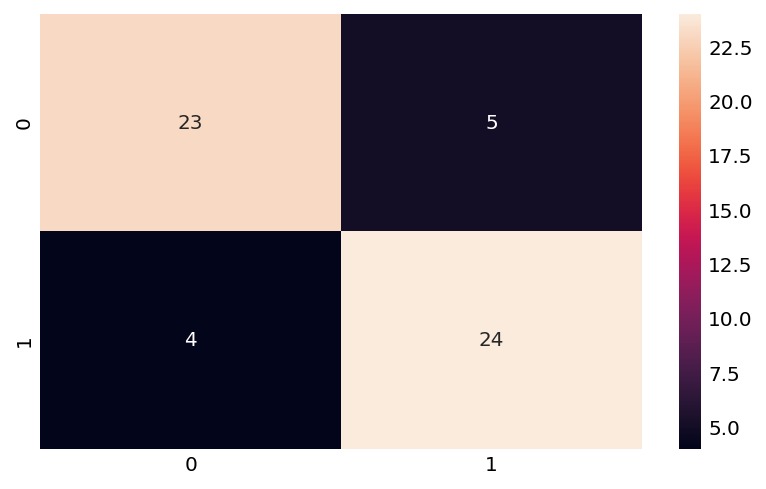

In [113]:
##Logistic Regression Model

#Training set
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
y_pp = lg.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(lg.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(lg.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       423
           1       0.56      0.21      0.30        24

    accuracy                           0.95       447
   macro avg       0.76      0.60      0.64       447
weighted avg       0.94      0.95      0.94       447

accuracy_unseen =  0.9485
accuracy is =  0.9485458612975392


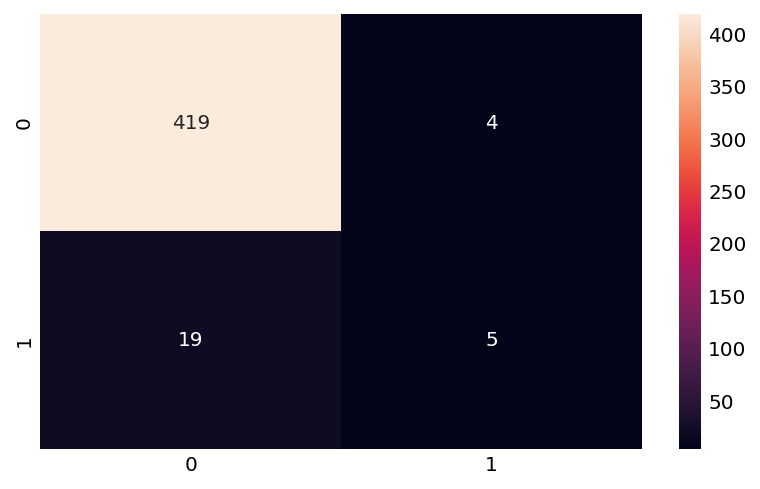

In [284]:
#Unseen set

lg.fit(X_us, y_us)

y_pred_us = lg.predict(X_us)
y_pp_us = lg.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(lg.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       338
           1       0.00      0.00      0.00        20

    accuracy                           0.94       358
   macro avg       0.47      0.50      0.49       358
weighted avg       0.89      0.94      0.92       358

accuracy_train =  0.9308
accuracy_test =  0.9441
accuracy is =  0.9441340782122905


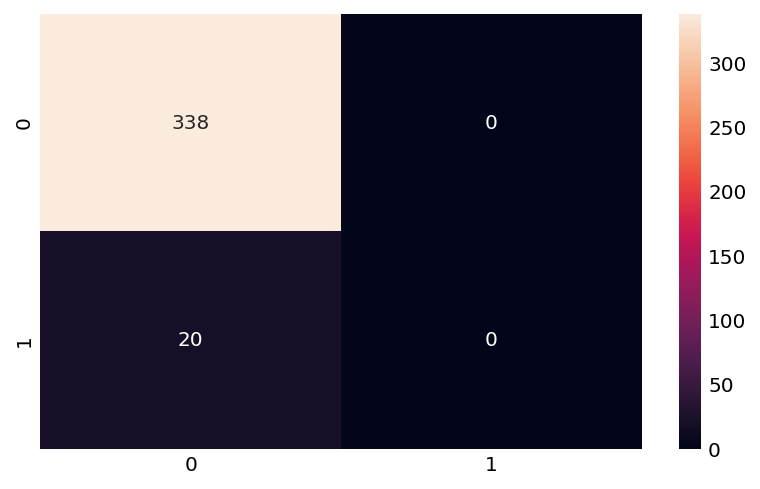

In [285]:
##Support Vector Machine

#Training set
svm = SVC(kernel='linear', probability=True, max_iter=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pp = svm.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(svm.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(svm.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.71      0.08      0.14       423
           1       0.03      0.42      0.05        24

    accuracy                           0.10       447
   macro avg       0.37      0.25      0.10       447
weighted avg       0.67      0.10      0.14       447

accuracy_unseen =  0.0984
accuracy is =  0.09843400447427293


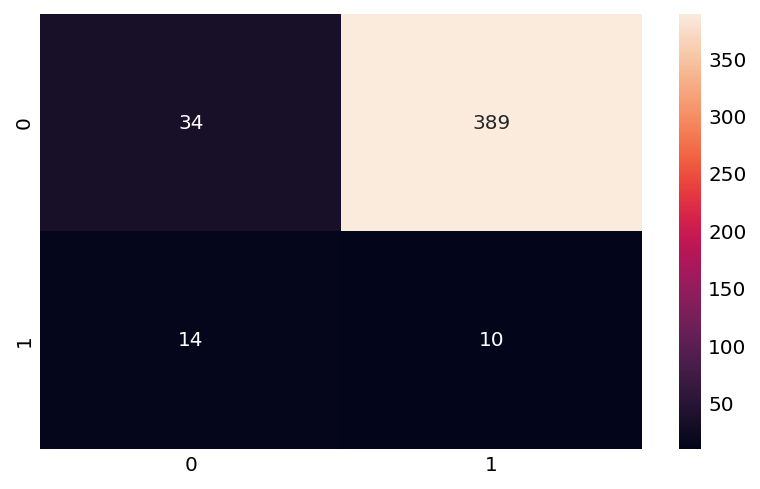

In [286]:
#Unseen set

svm.fit(X_us, y_us)

y_pred_us = svm.predict(X_us)
y_pp_us = svm.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(svm.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       338
           1       0.18      0.75      0.29        20

    accuracy                           0.80       358
   macro avg       0.58      0.78      0.59       358
weighted avg       0.94      0.80      0.85       358

accuracy_train =  0.8260
accuracy_test =  0.7989
accuracy is =  0.7988826815642458


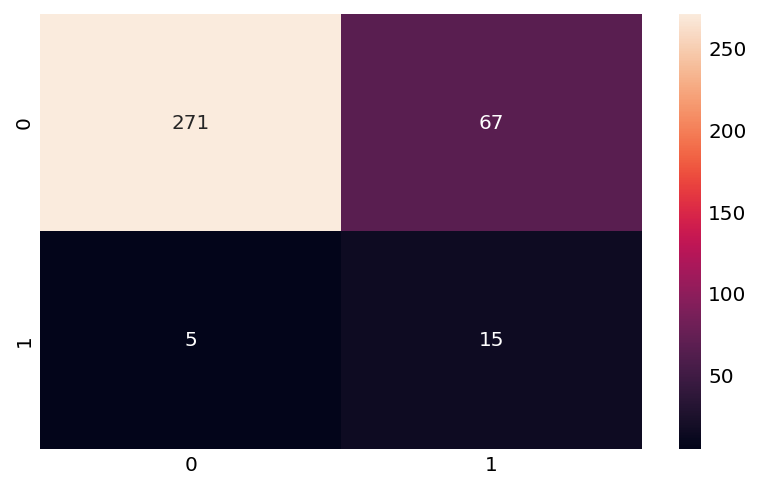

In [287]:
#Naive Bayes model

nb = GaussianNB()

#Training set
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_pp = nb.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(nb.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(nb.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       423
           1       0.22      0.67      0.33        24

    accuracy                           0.85       447
   macro avg       0.60      0.76      0.62       447
weighted avg       0.94      0.85      0.89       447

accuracy_unseen =  0.8523
accuracy is =  0.8523489932885906


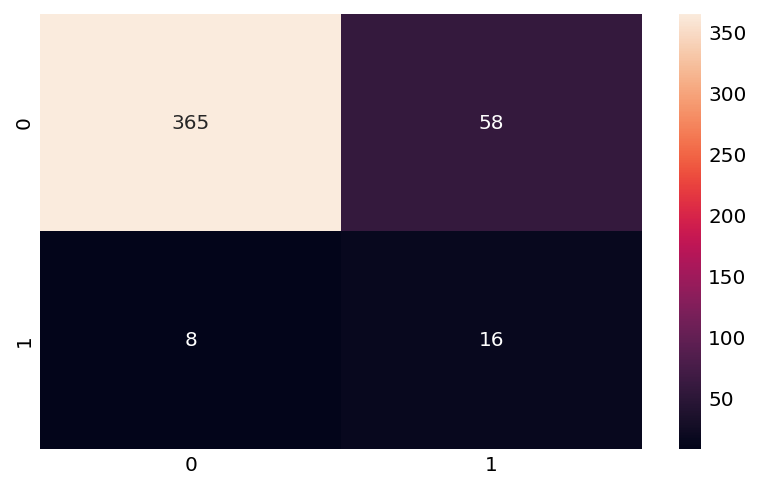

In [288]:
#Unseen set

nb.fit(X_us, y_us)

y_pred_us = nb.predict(X_us)
y_pp_us = nb.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(nb.score(X_us, y_us)))
print('accuracy is = ', ac_us)